# Fachprojekt Machine Learning
**Authors:** Anastasiia Korzhylova, Ivan Shishkin, Ramneek Agnihotri, Rodi Mehi

**Due date:** Wednesday, 12. June 2024

## Import necessary components

In [1]:
# Import the necessary libraries
import time, warnings
from tabulate import tabulate
import torch, torch.nn.functional as F
from torch.optim.lr_scheduler import StepLR, ExponentialLR, CosineAnnealingLR

# Import the VAE model and functions
import networks
from datasets import create_datasets
from evaluation import evaluate
from sampling import sample, plot_reconstruction
from plotting import plot_loss_lr, plot_loss_components

## Set hyperparameters, loss function and optimizing tools

In [2]:
# Hyperparameters
batch_size = 128 # Number of images per update of the network
num_epochs = 100 # One epoch means seeing every image of the training datasetSS
latent_dim = 256  # Size of the latent space
input_channels = 3  # CIFAR-10 images have 3 color channels
learning_rate = 5e-5 # Determines how drastically the parameters of the network change
output_frequency = 150 # Determines how often the training progress will be logged (in batches)

# Select the device that will be used for training: GPU, if available, otherwise CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')
print('=========================================')

# Put the neural network on the selected device
model = networks.VAE(input_channels, latent_dim)
model.to(device)

# Loss function
def loss_function(recon_x, x, mu, logvar):
    MSE = F.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return MSE + 0.0001*KLD, MSE, KLD

# Optimizer selection
optimizer_option = 'adamw'

optimizer = None
if optimizer_option == "adam":
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
elif optimizer_option == "adamw":
  optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
elif optimizer_option == "rmsprop":
  optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
else:
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Learning rate scheduler parameters
lr_schedule_option = 'cosine'

scheduler = None
if lr_schedule_option == 'step':
  scheduler = StepLR(optimizer, step_size=30, gamma=0.5)
elif lr_schedule_option == 'exponential':
  scheduler = ExponentialLR(optimizer, gamma=0.9)
elif lr_schedule_option == 'cosine':
  scheduler = CosineAnnealingLR(optimizer, T_max=50, eta_min=1e-5)

# Scaler for AMP
scaler = torch.cuda.amp.GradScaler()

Using device: cuda


## Choose a dataset for training

100%|██████████| 170498071/170498071 [00:18<00:00, 9234311.23it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


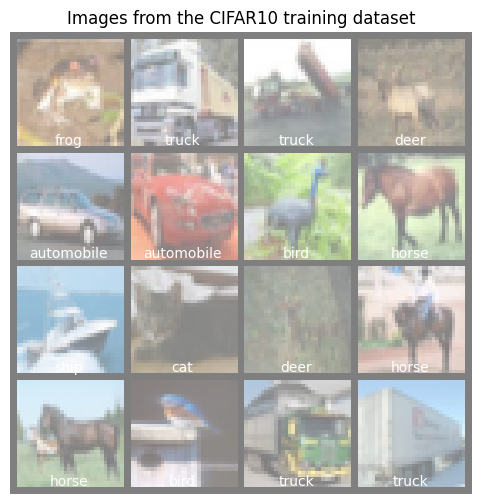

In [3]:
# Create and visualize the datasets for MNIST / CIFAR10
dataset_name = 'CIFAR10'
train_loader, test_loader = create_datasets(dataset_name, batch_size)

## Training loop

-----------------------------------------------------------------------------------------------------------------------------
Epoch:  1/100  Batch:    1  Train Loss:  30876.4  LR:  5e-05
Epoch:  1/100  Batch:  151  Train Loss:  23637.7  LR:  5e-05
Epoch:  1/100  Batch:  301  Train Loss:  15025.9  LR:  5e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│       1 │          11165.1 │ 7.60s  │
╘═════════╧══════════════════╧════════╛


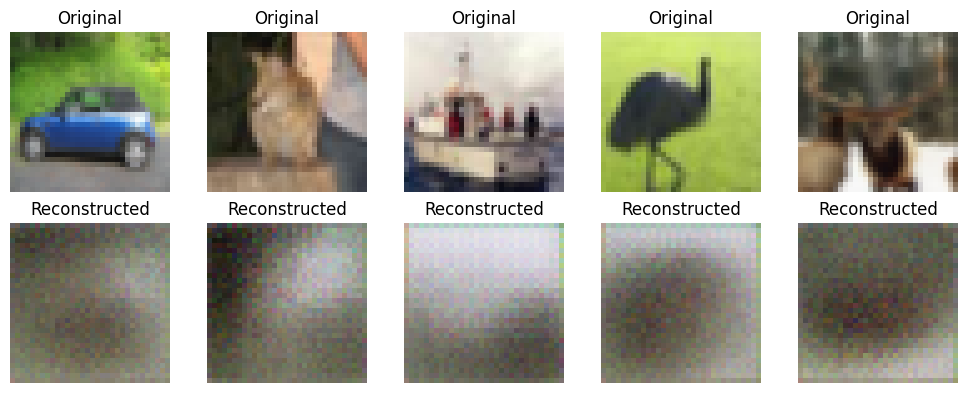

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  2/100  Batch:    1  Train Loss:  10781.5  LR:  4.99605e-05
Epoch:  2/100  Batch:  151  Train Loss:  10902.2  LR:  4.99605e-05
Epoch:  2/100  Batch:  301  Train Loss:  9973.97  LR:  4.99605e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│       2 │          9143.85 │ 5.16s  │
╘═════════╧══════════════════╧════════╛


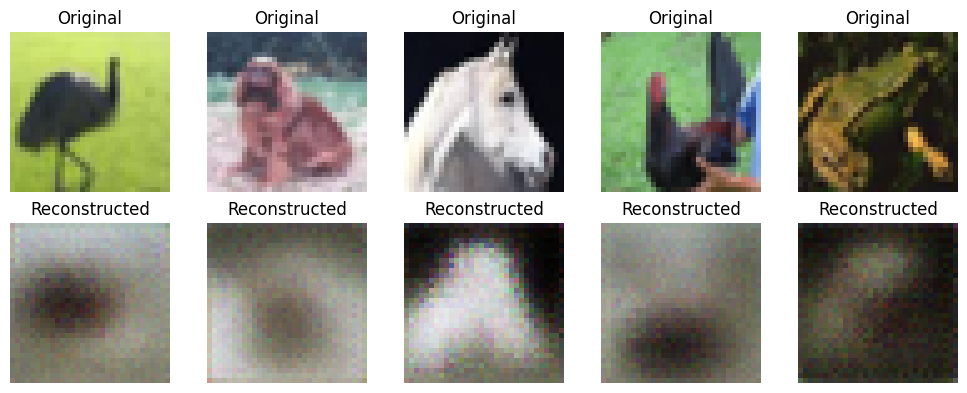

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  3/100  Batch:    1  Train Loss:  9860.06  LR:  4.98423e-05
Epoch:  3/100  Batch:  151  Train Loss:  9109.69  LR:  4.98423e-05
Epoch:  3/100  Batch:  301  Train Loss:  8771.83  LR:  4.98423e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│       3 │          7991.15 │ 5.10s  │
╘═════════╧══════════════════╧════════╛


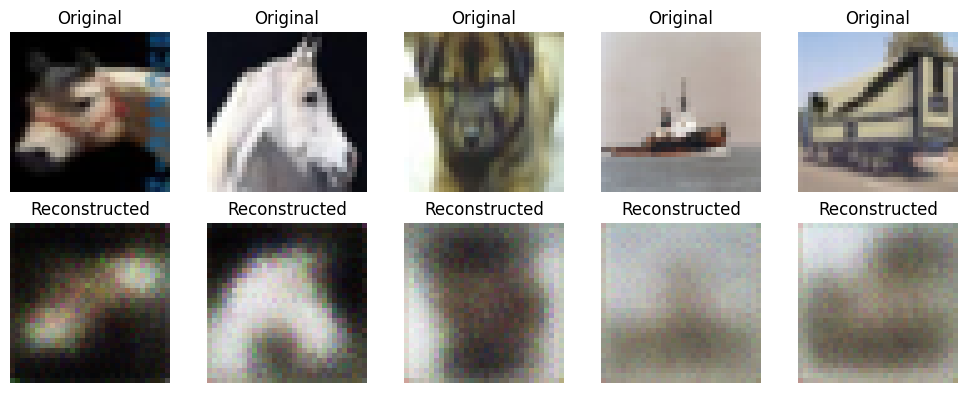

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  4/100  Batch:    1  Train Loss:  8483.77  LR:  4.96457e-05
Epoch:  4/100  Batch:  151  Train Loss:  7669.72  LR:  4.96457e-05
Epoch:  4/100  Batch:  301  Train Loss:  7335.01  LR:  4.96457e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│       4 │          7135.52 │ 4.96s  │
╘═════════╧══════════════════╧════════╛


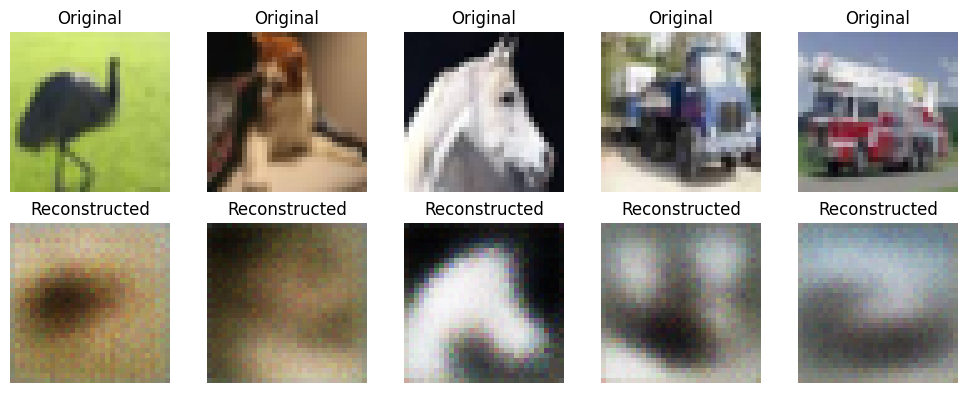

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  5/100  Batch:    1  Train Loss:  7178.4  LR:  4.93717e-05
Epoch:  5/100  Batch:  151  Train Loss:  6966.99  LR:  4.93717e-05
Epoch:  5/100  Batch:  301  Train Loss:  6751.06  LR:  4.93717e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│       5 │          6468.67 │ 5.13s  │
╘═════════╧══════════════════╧════════╛


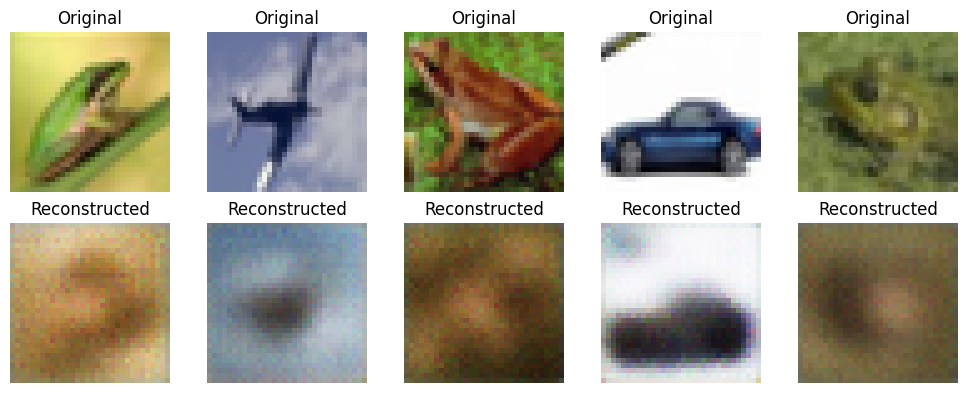

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  6/100  Batch:    1  Train Loss:  6327.81  LR:  4.90211e-05
Epoch:  6/100  Batch:  151  Train Loss:  6420.01  LR:  4.90211e-05
Epoch:  6/100  Batch:  301  Train Loss:  6245.02  LR:  4.90211e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│       6 │          5976.34 │ 5.18s  │
╘═════════╧══════════════════╧════════╛


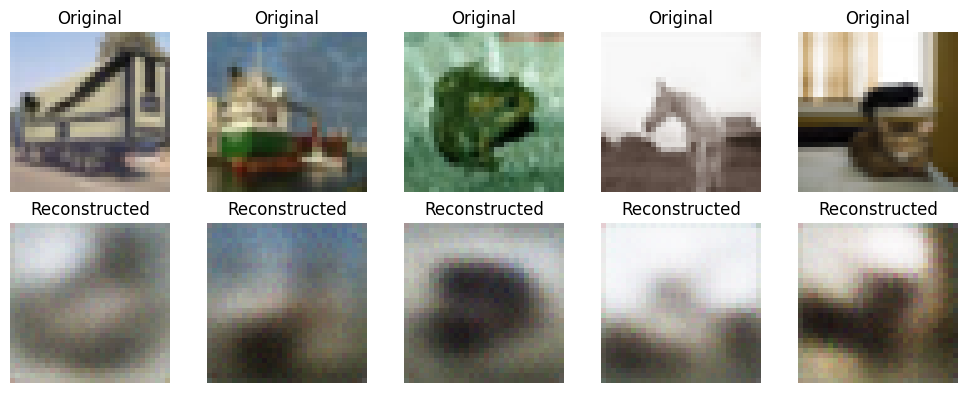

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  7/100  Batch:    1  Train Loss:  6011.27  LR:  4.85955e-05
Epoch:  7/100  Batch:  151  Train Loss:  6042.56  LR:  4.85955e-05
Epoch:  7/100  Batch:  301  Train Loss:  6009.69  LR:  4.85955e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│       7 │           5892.7 │ 5.08s  │
╘═════════╧══════════════════╧════════╛


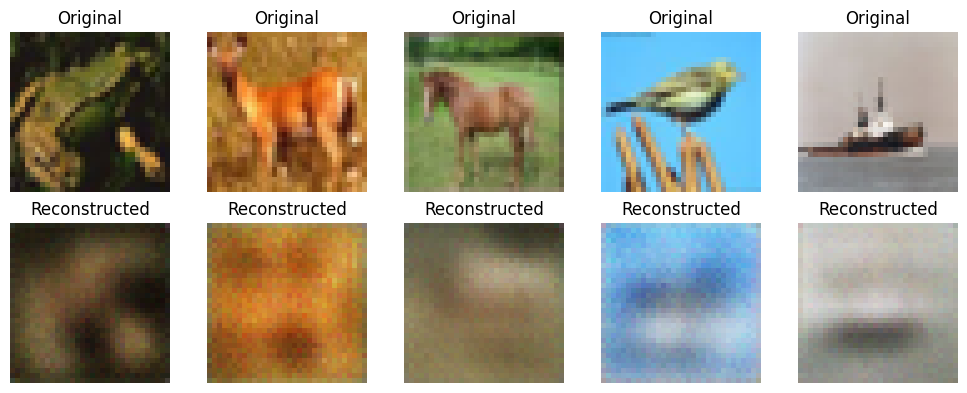

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  8/100  Batch:    1  Train Loss:  6767.22  LR:  4.80965e-05
Epoch:  8/100  Batch:  151  Train Loss:  5875.75  LR:  4.80965e-05
Epoch:  8/100  Batch:  301  Train Loss:  5778.09  LR:  4.80965e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│       8 │          5577.63 │ 5.01s  │
╘═════════╧══════════════════╧════════╛


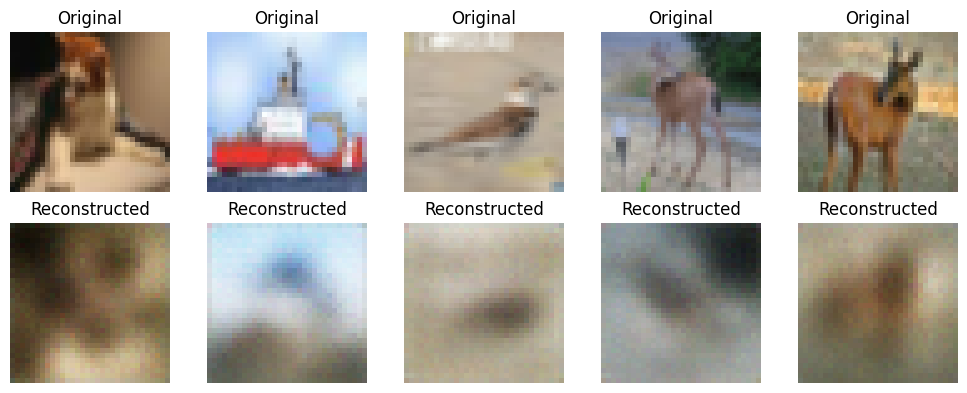

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  9/100  Batch:    1  Train Loss:  5141.27  LR:  4.75261e-05
Epoch:  9/100  Batch:  151  Train Loss:  5623.84  LR:  4.75261e-05
Epoch:  9/100  Batch:  301  Train Loss:  5625.8  LR:  4.75261e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│       9 │          5421.99 │ 5.15s  │
╘═════════╧══════════════════╧════════╛


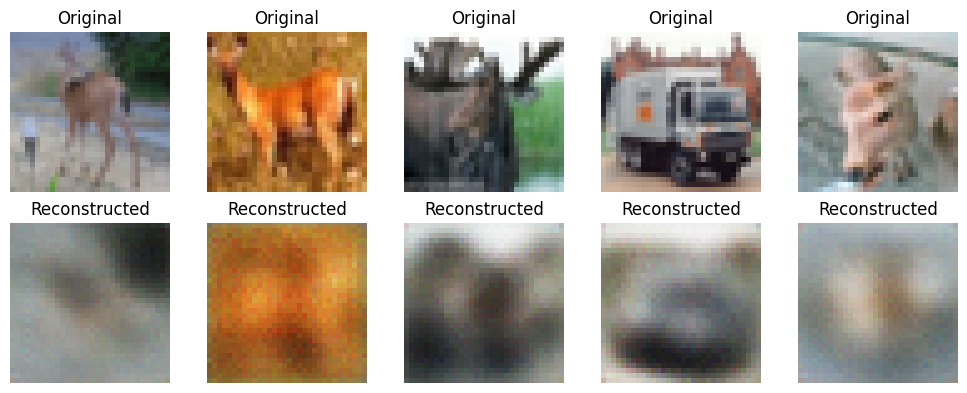

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  10/100  Batch:    1  Train Loss:  5782.28  LR:  4.68866e-05
Epoch:  10/100  Batch:  151  Train Loss:  5451.14  LR:  4.68866e-05
Epoch:  10/100  Batch:  301  Train Loss:  5403.87  LR:  4.68866e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      10 │          5210.04 │ 5.12s  │
╘═════════╧══════════════════╧════════╛


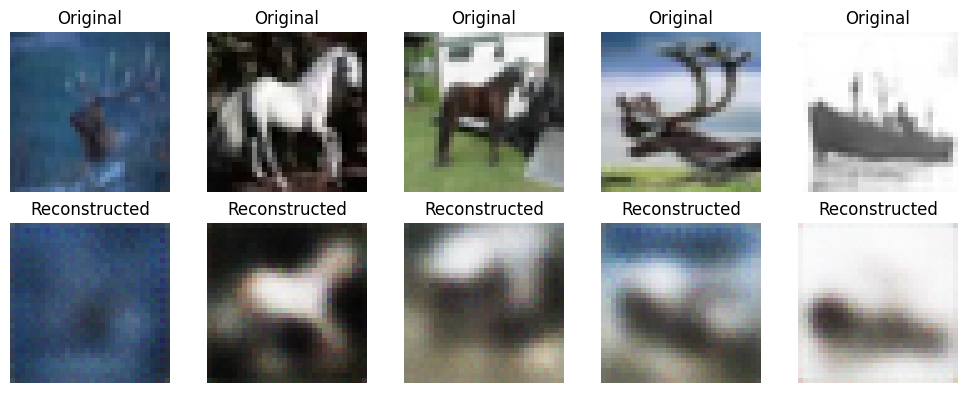

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  11/100  Batch:    1  Train Loss:  5204.81  LR:  4.61803e-05
Epoch:  11/100  Batch:  151  Train Loss:  5272.68  LR:  4.61803e-05
Epoch:  11/100  Batch:  301  Train Loss:  5258.44  LR:  4.61803e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      11 │          5027.37 │ 5.23s  │
╘═════════╧══════════════════╧════════╛


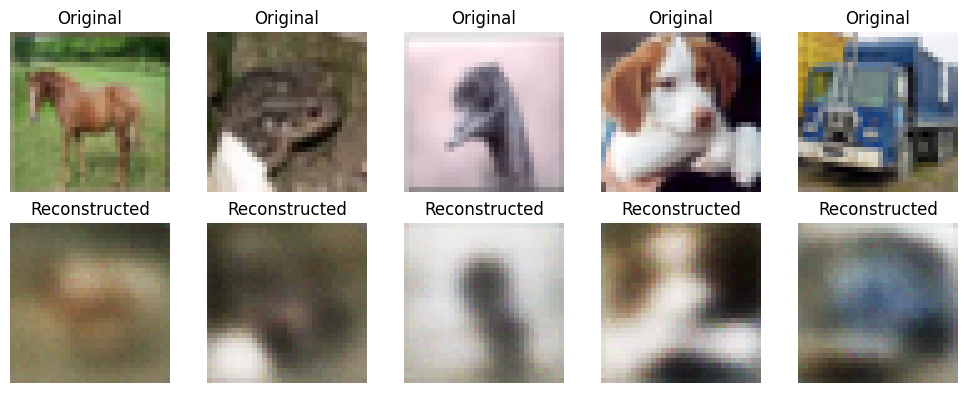

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  12/100  Batch:    1  Train Loss:  5007.63  LR:  4.54103e-05
Epoch:  12/100  Batch:  151  Train Loss:  5125.07  LR:  4.54103e-05
Epoch:  12/100  Batch:  301  Train Loss:  5093.92  LR:  4.54103e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      12 │          4972.94 │ 5.02s  │
╘═════════╧══════════════════╧════════╛


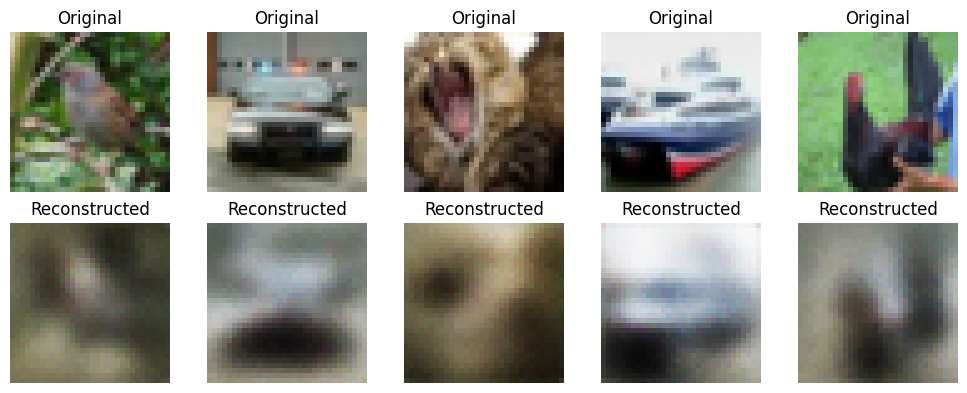

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  13/100  Batch:    1  Train Loss:  4987.21  LR:  4.45794e-05
Epoch:  13/100  Batch:  151  Train Loss:  5067.4  LR:  4.45794e-05
Epoch:  13/100  Batch:  301  Train Loss:  5018.75  LR:  4.45794e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      13 │          4862.19 │ 5.13s  │
╘═════════╧══════════════════╧════════╛


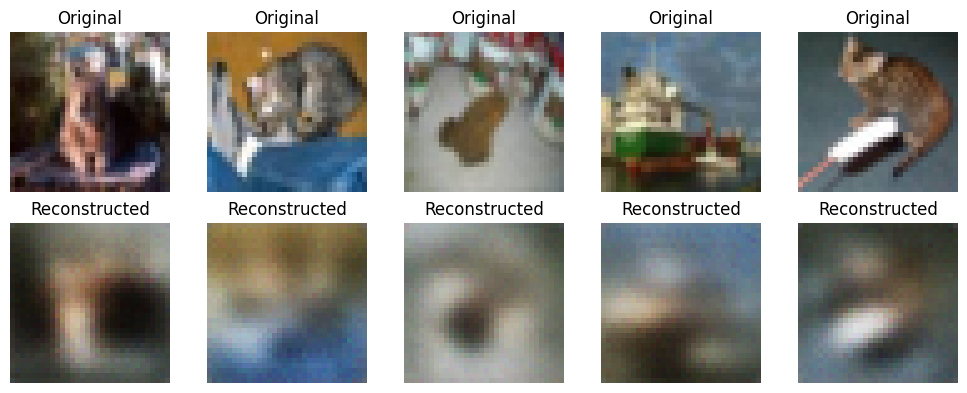

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  14/100  Batch:    1  Train Loss:  5003.05  LR:  4.36909e-05
Epoch:  14/100  Batch:  151  Train Loss:  4976.98  LR:  4.36909e-05
Epoch:  14/100  Batch:  301  Train Loss:  4940.59  LR:  4.36909e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      14 │          4888.95 │ 5.05s  │
╘═════════╧══════════════════╧════════╛


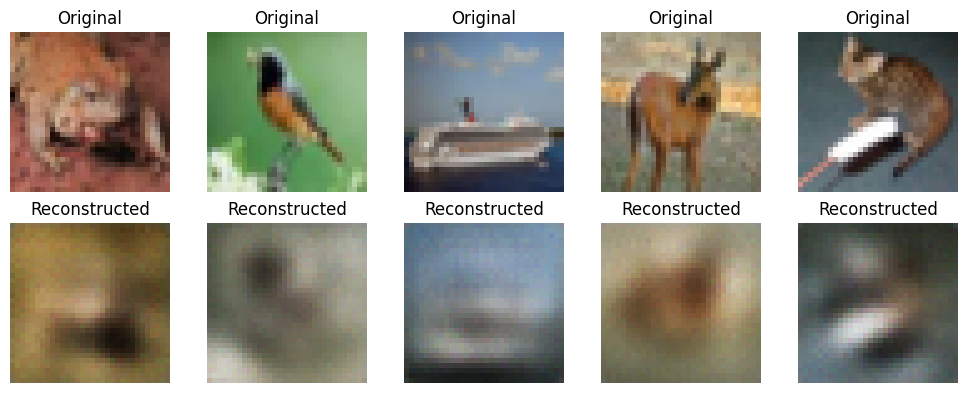

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  15/100  Batch:    1  Train Loss:  5076.57  LR:  4.27485e-05
Epoch:  15/100  Batch:  151  Train Loss:  4863.46  LR:  4.27485e-05
Epoch:  15/100  Batch:  301  Train Loss:  4853.87  LR:  4.27485e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      15 │          4746.21 │ 5.01s  │
╘═════════╧══════════════════╧════════╛


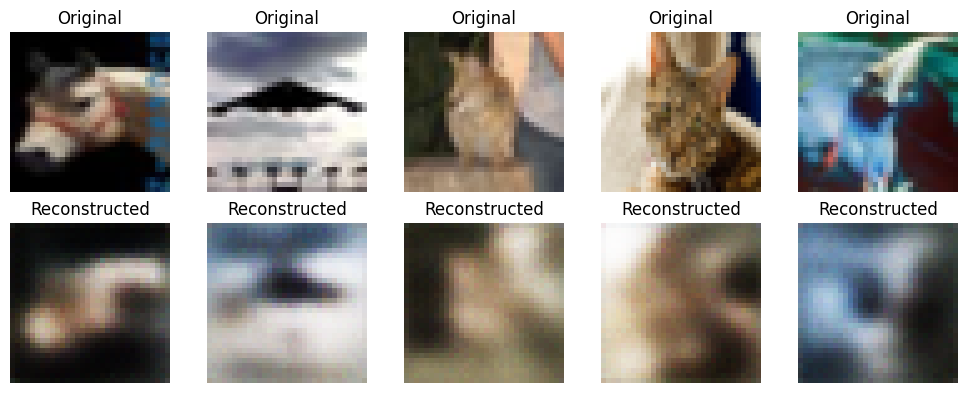

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  16/100  Batch:    1  Train Loss:  5400.02  LR:  4.17557e-05
Epoch:  16/100  Batch:  151  Train Loss:  4802.74  LR:  4.17557e-05
Epoch:  16/100  Batch:  301  Train Loss:  4734.17  LR:  4.17557e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      16 │          4648.21 │ 5.05s  │
╘═════════╧══════════════════╧════════╛


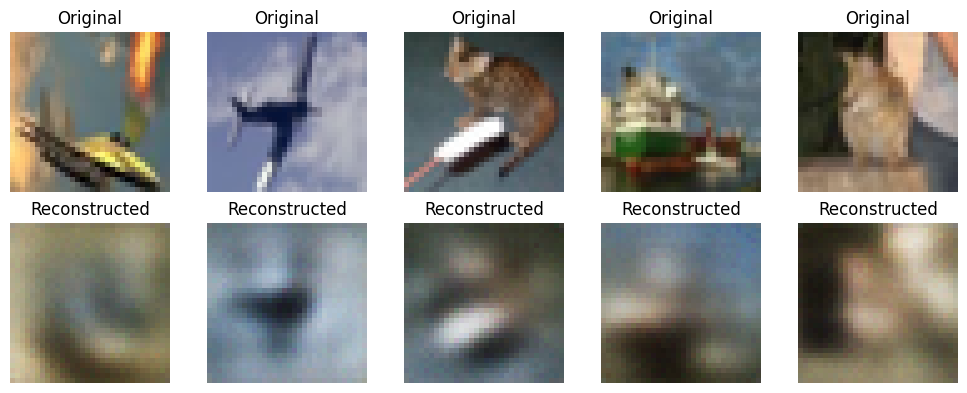

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  17/100  Batch:    1  Train Loss:  4546.4  LR:  4.07165e-05
Epoch:  17/100  Batch:  151  Train Loss:  4694.48  LR:  4.07165e-05
Epoch:  17/100  Batch:  301  Train Loss:  4677.39  LR:  4.07165e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      17 │          4635.67 │ 5.03s  │
╘═════════╧══════════════════╧════════╛


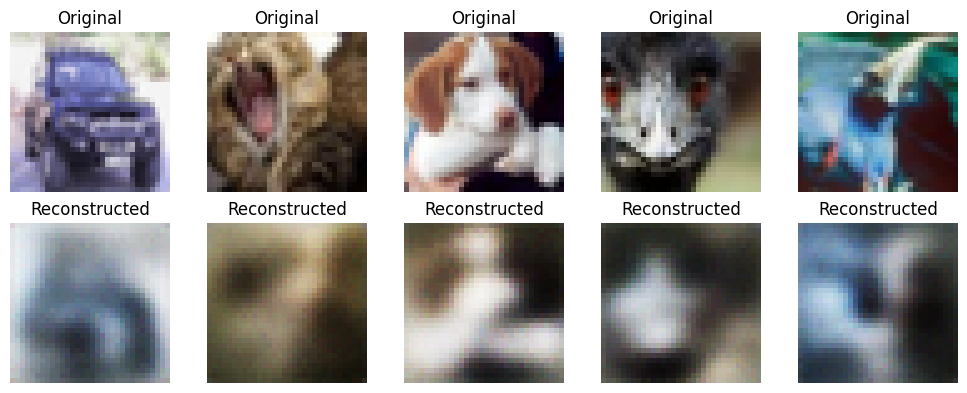

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  18/100  Batch:    1  Train Loss:  4552.88  LR:  3.96351e-05
Epoch:  18/100  Batch:  151  Train Loss:  4614.95  LR:  3.96351e-05
Epoch:  18/100  Batch:  301  Train Loss:  4605.88  LR:  3.96351e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      18 │          4504.49 │ 4.97s  │
╘═════════╧══════════════════╧════════╛


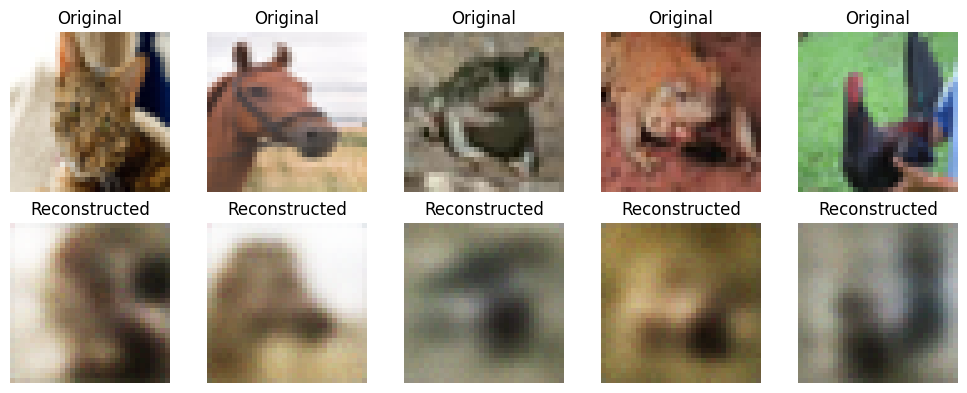

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  19/100  Batch:    1  Train Loss:  4535  LR:  3.85156e-05
Epoch:  19/100  Batch:  151  Train Loss:  4535.09  LR:  3.85156e-05
Epoch:  19/100  Batch:  301  Train Loss:  4530.11  LR:  3.85156e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      19 │           4473.3 │ 5.12s  │
╘═════════╧══════════════════╧════════╛


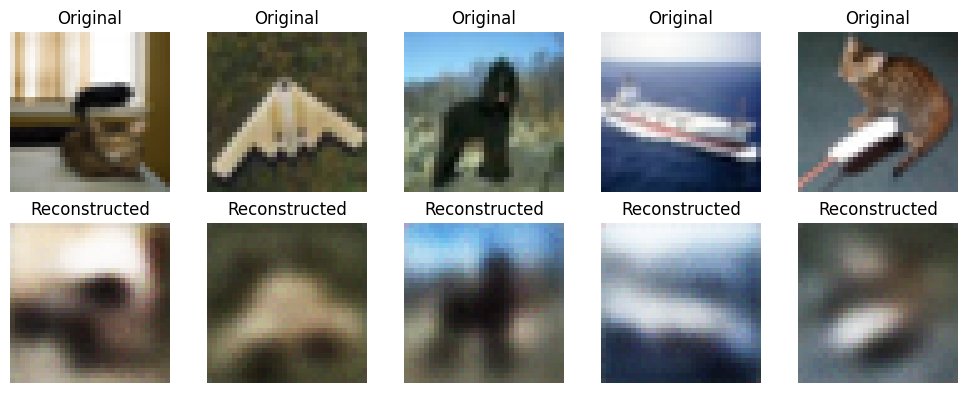

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  20/100  Batch:    1  Train Loss:  4472.47  LR:  3.73625e-05
Epoch:  20/100  Batch:  151  Train Loss:  4506.02  LR:  3.73625e-05
Epoch:  20/100  Batch:  301  Train Loss:  4430.19  LR:  3.73625e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      20 │           4321.9 │ 4.97s  │
╘═════════╧══════════════════╧════════╛


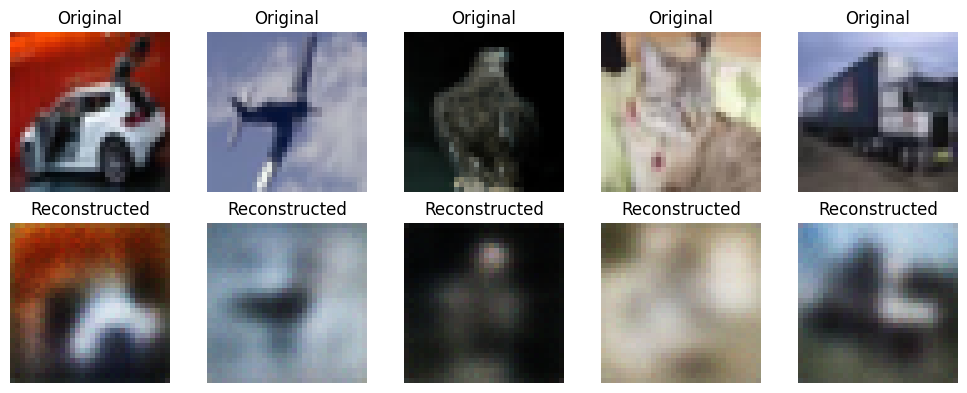

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  21/100  Batch:    1  Train Loss:  4546.08  LR:  3.61803e-05
Epoch:  21/100  Batch:  151  Train Loss:  4412.38  LR:  3.61803e-05
Epoch:  21/100  Batch:  301  Train Loss:  4364.75  LR:  3.61803e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      21 │          4310.06 │ 5.16s  │
╘═════════╧══════════════════╧════════╛


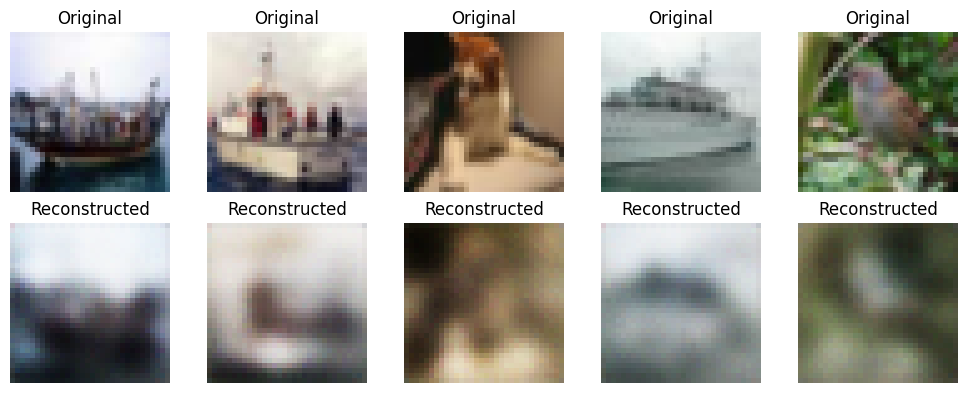

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  22/100  Batch:    1  Train Loss:  4237.39  LR:  3.49738e-05
Epoch:  22/100  Batch:  151  Train Loss:  4323.25  LR:  3.49738e-05
Epoch:  22/100  Batch:  301  Train Loss:  4309.64  LR:  3.49738e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      22 │          4284.33 │ 4.97s  │
╘═════════╧══════════════════╧════════╛


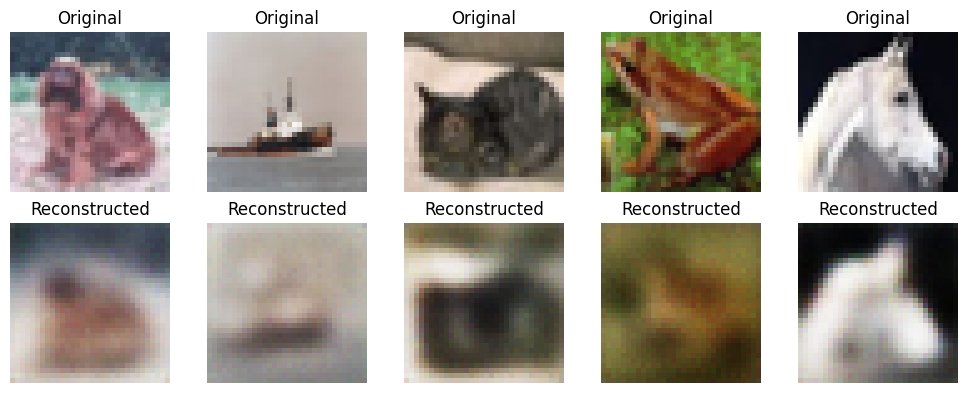

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  23/100  Batch:    1  Train Loss:  4160.5  LR:  3.37476e-05
Epoch:  23/100  Batch:  151  Train Loss:  4260.85  LR:  3.37476e-05
Epoch:  23/100  Batch:  301  Train Loss:  4240.2  LR:  3.37476e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      23 │          4103.34 │ 5.11s  │
╘═════════╧══════════════════╧════════╛


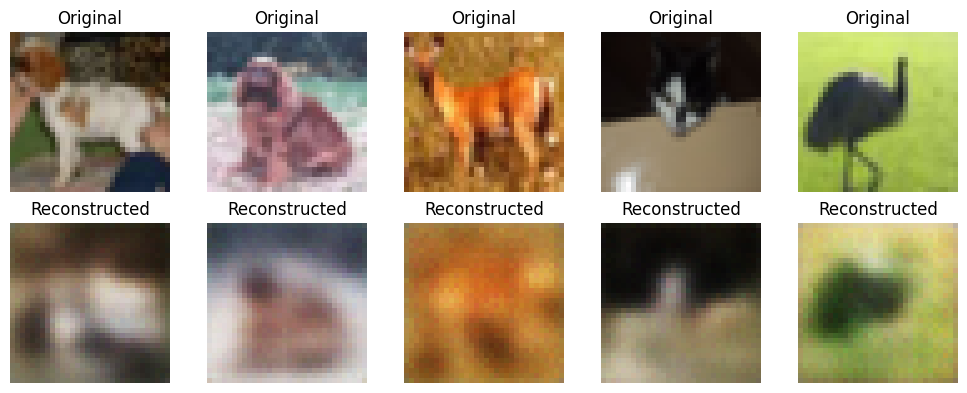

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  24/100  Batch:    1  Train Loss:  4036.29  LR:  3.25067e-05
Epoch:  24/100  Batch:  151  Train Loss:  4212.88  LR:  3.25067e-05
Epoch:  24/100  Batch:  301  Train Loss:  4219.38  LR:  3.25067e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      24 │          4192.69 │ 5.06s  │
╘═════════╧══════════════════╧════════╛


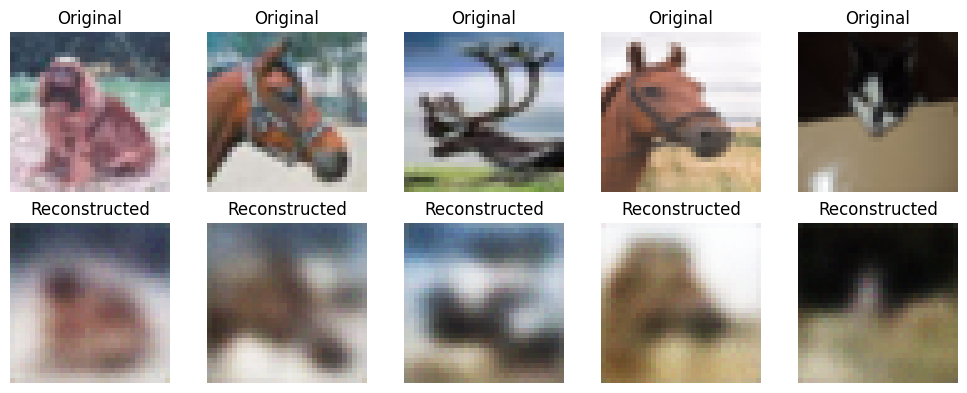

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  25/100  Batch:    1  Train Loss:  4172.86  LR:  3.12558e-05
Epoch:  25/100  Batch:  151  Train Loss:  4193.32  LR:  3.12558e-05
Epoch:  25/100  Batch:  301  Train Loss:  4163.27  LR:  3.12558e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      25 │          4093.46 │ 5.03s  │
╘═════════╧══════════════════╧════════╛


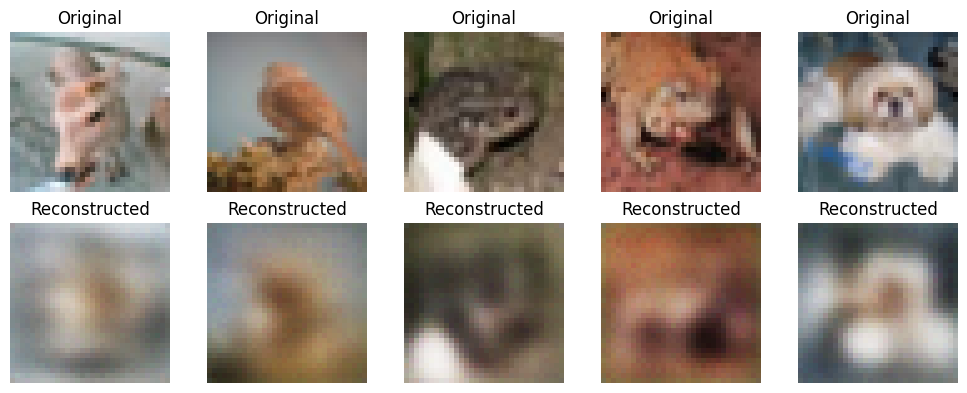

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  26/100  Batch:    1  Train Loss:  3945.33  LR:  3e-05
Epoch:  26/100  Batch:  151  Train Loss:  4113.38  LR:  3e-05
Epoch:  26/100  Batch:  301  Train Loss:  4084  LR:  3e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      26 │           4043.9 │ 5.52s  │
╘═════════╧══════════════════╧════════╛


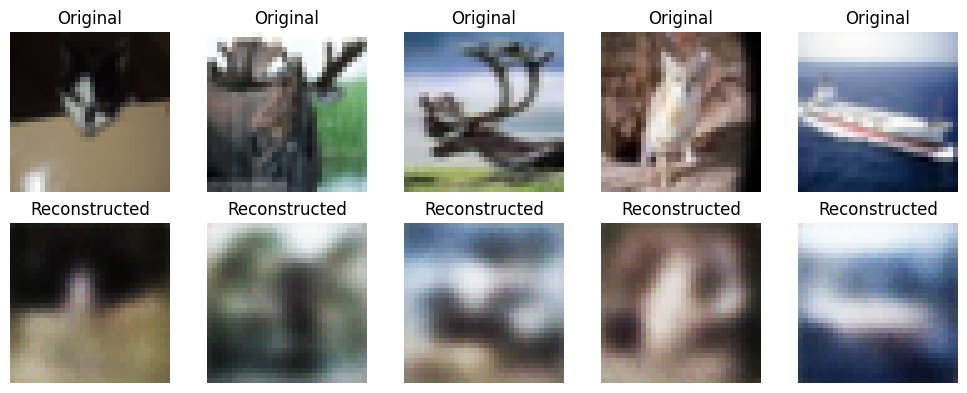

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  27/100  Batch:    1  Train Loss:  3933.1  LR:  2.87442e-05
Epoch:  27/100  Batch:  151  Train Loss:  4038.34  LR:  2.87442e-05
Epoch:  27/100  Batch:  301  Train Loss:  4080.9  LR:  2.87442e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      27 │          4076.05 │ 5.08s  │
╘═════════╧══════════════════╧════════╛


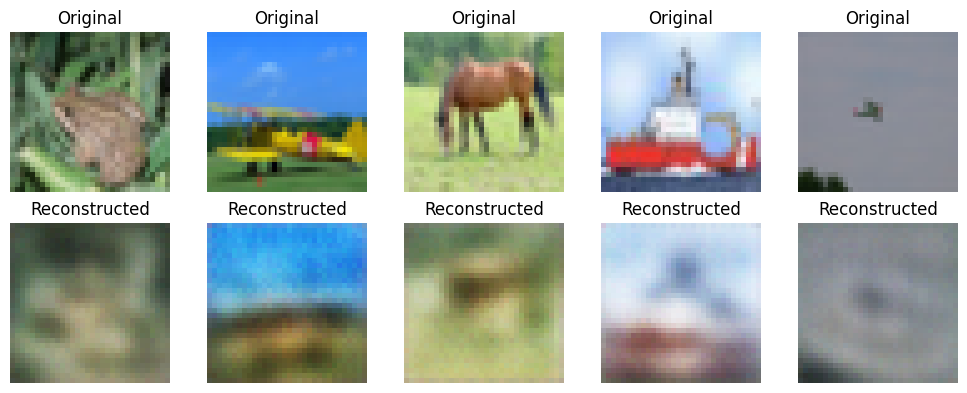

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  28/100  Batch:    1  Train Loss:  3917.8  LR:  2.74933e-05
Epoch:  28/100  Batch:  151  Train Loss:  4018.74  LR:  2.74933e-05
Epoch:  28/100  Batch:  301  Train Loss:  4016.7  LR:  2.74933e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      28 │             3943 │ 5.14s  │
╘═════════╧══════════════════╧════════╛


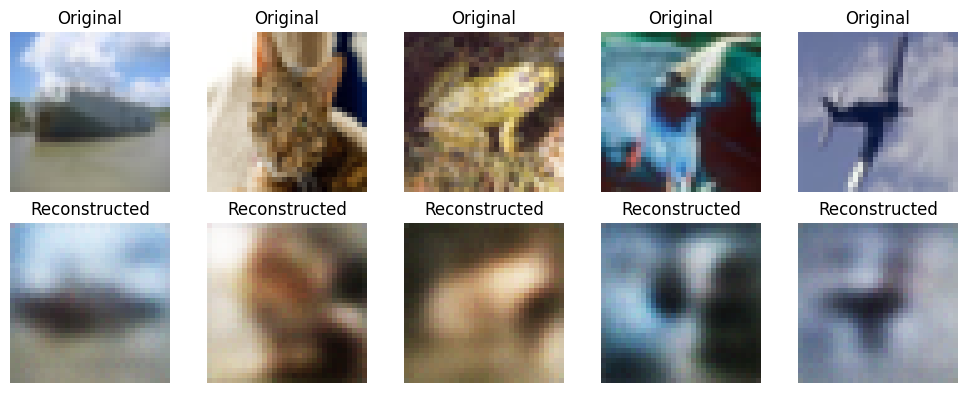

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  29/100  Batch:    1  Train Loss:  4041.65  LR:  2.62524e-05
Epoch:  29/100  Batch:  151  Train Loss:  3957.61  LR:  2.62524e-05
Epoch:  29/100  Batch:  301  Train Loss:  3952.98  LR:  2.62524e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      29 │          3865.05 │ 5.14s  │
╘═════════╧══════════════════╧════════╛


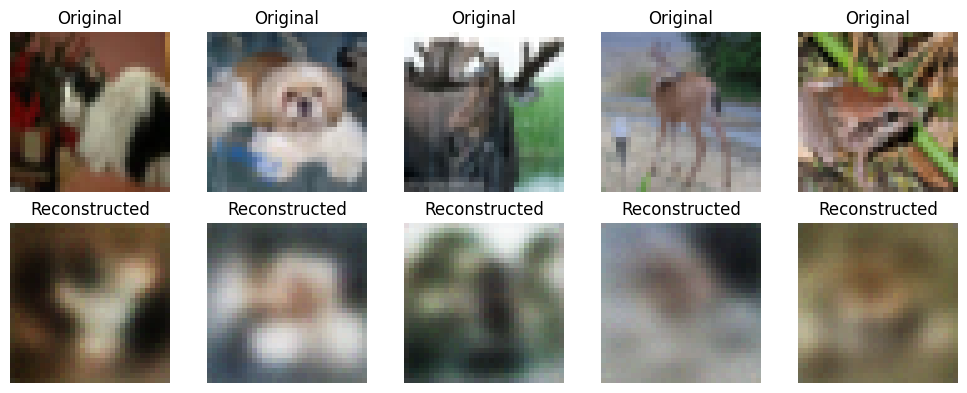

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  30/100  Batch:    1  Train Loss:  3836.31  LR:  2.50262e-05
Epoch:  30/100  Batch:  151  Train Loss:  3964.75  LR:  2.50262e-05
Epoch:  30/100  Batch:  301  Train Loss:  3925.56  LR:  2.50262e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      30 │          3861.22 │ 5.11s  │
╘═════════╧══════════════════╧════════╛


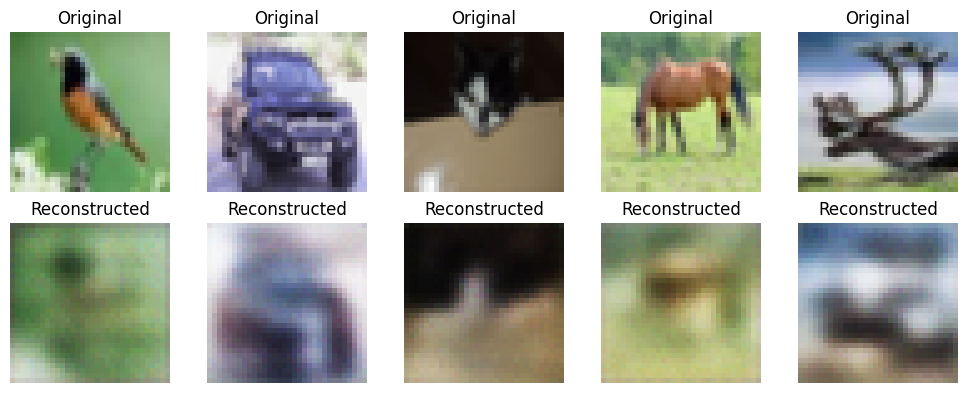

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  31/100  Batch:    1  Train Loss:  4000.33  LR:  2.38197e-05
Epoch:  31/100  Batch:  151  Train Loss:  3946.78  LR:  2.38197e-05
Epoch:  31/100  Batch:  301  Train Loss:  3894.14  LR:  2.38197e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      31 │          3856.56 │ 5.13s  │
╘═════════╧══════════════════╧════════╛


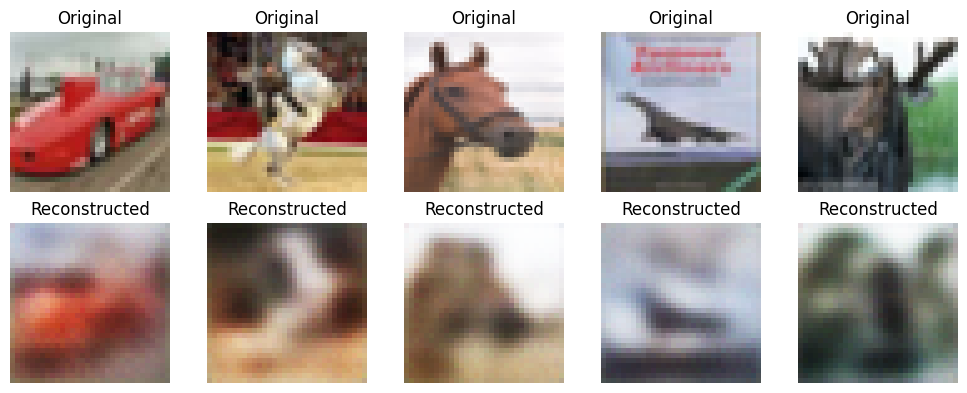

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  32/100  Batch:    1  Train Loss:  3918.26  LR:  2.26375e-05
Epoch:  32/100  Batch:  151  Train Loss:  3904.16  LR:  2.26375e-05
Epoch:  32/100  Batch:  301  Train Loss:  3860.23  LR:  2.26375e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      32 │          3801.96 │ 5.03s  │
╘═════════╧══════════════════╧════════╛


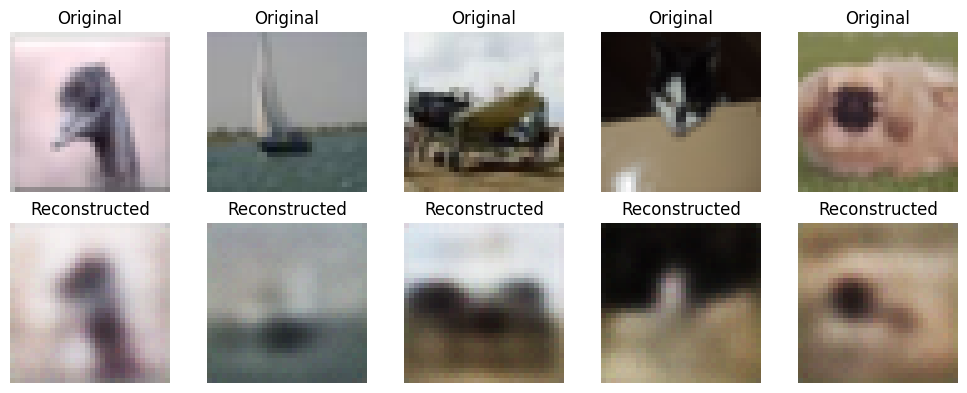

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  33/100  Batch:    1  Train Loss:  3702.31  LR:  2.14844e-05
Epoch:  33/100  Batch:  151  Train Loss:  3871.27  LR:  2.14844e-05
Epoch:  33/100  Batch:  301  Train Loss:  3854.38  LR:  2.14844e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      33 │          3914.98 │ 5.08s  │
╘═════════╧══════════════════╧════════╛


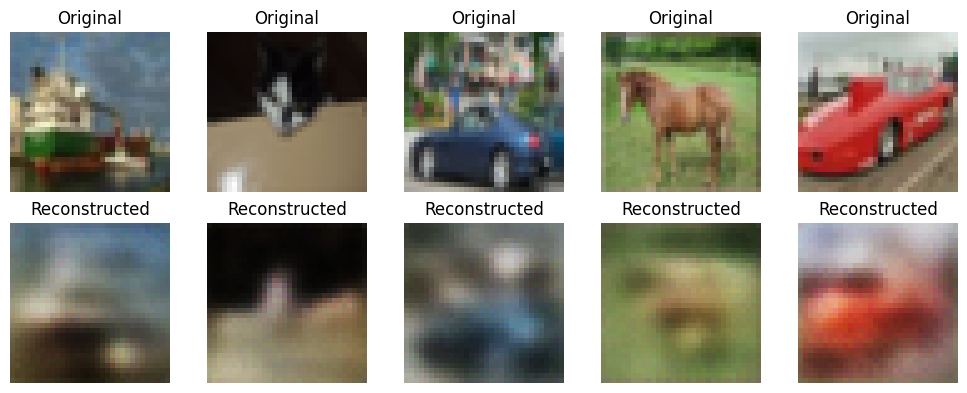

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  34/100  Batch:    1  Train Loss:  4023.98  LR:  2.03649e-05
Epoch:  34/100  Batch:  151  Train Loss:  3815.35  LR:  2.03649e-05
Epoch:  34/100  Batch:  301  Train Loss:  3846.95  LR:  2.03649e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      34 │          3730.01 │ 5.11s  │
╘═════════╧══════════════════╧════════╛


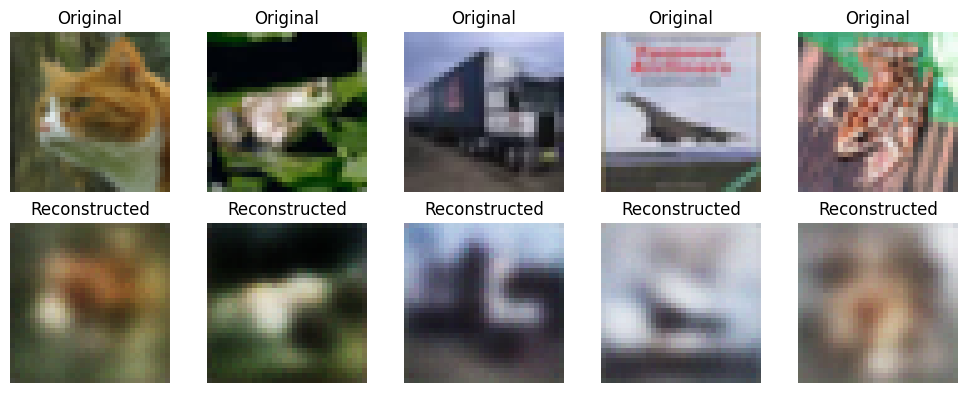

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  35/100  Batch:    1  Train Loss:  3921.82  LR:  1.92835e-05
Epoch:  35/100  Batch:  151  Train Loss:  3806.36  LR:  1.92835e-05
Epoch:  35/100  Batch:  301  Train Loss:  3797.96  LR:  1.92835e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      35 │          3717.68 │ 5.13s  │
╘═════════╧══════════════════╧════════╛


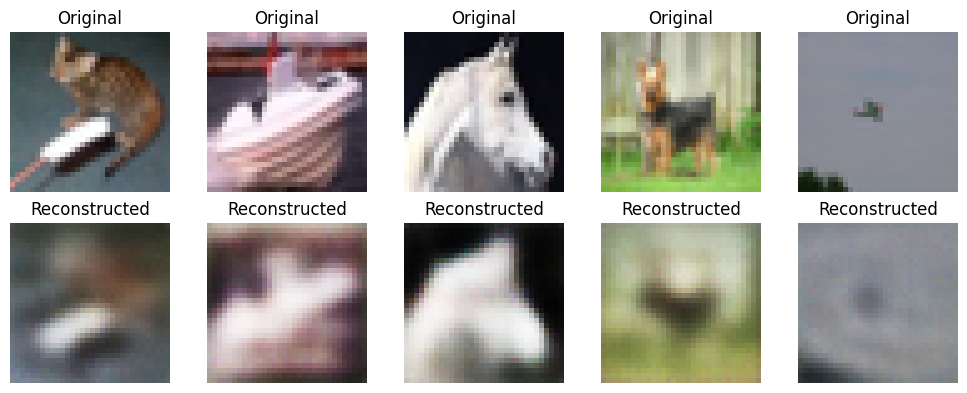

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  36/100  Batch:    1  Train Loss:  3398.66  LR:  1.82443e-05
Epoch:  36/100  Batch:  151  Train Loss:  3803.1  LR:  1.82443e-05
Epoch:  36/100  Batch:  301  Train Loss:  3809.59  LR:  1.82443e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      36 │          3745.84 │ 5.22s  │
╘═════════╧══════════════════╧════════╛


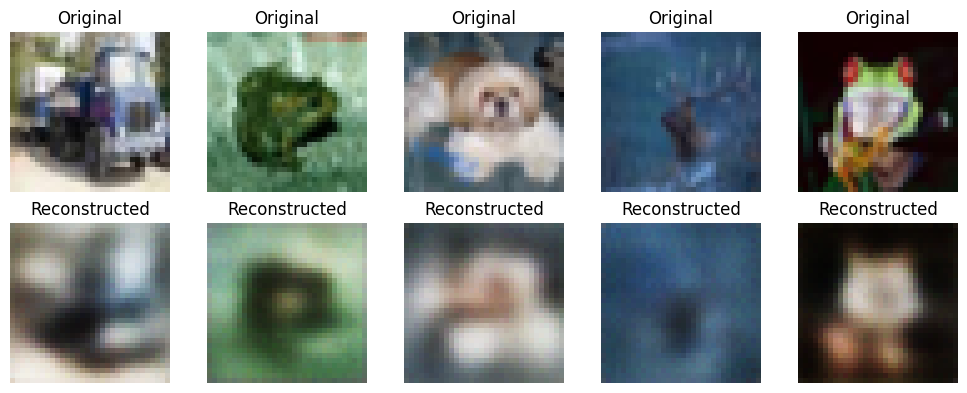

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  37/100  Batch:    1  Train Loss:  4014.57  LR:  1.72515e-05
Epoch:  37/100  Batch:  151  Train Loss:  3805.3  LR:  1.72515e-05
Epoch:  37/100  Batch:  301  Train Loss:  3753.79  LR:  1.72515e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      37 │          3769.44 │ 5.17s  │
╘═════════╧══════════════════╧════════╛


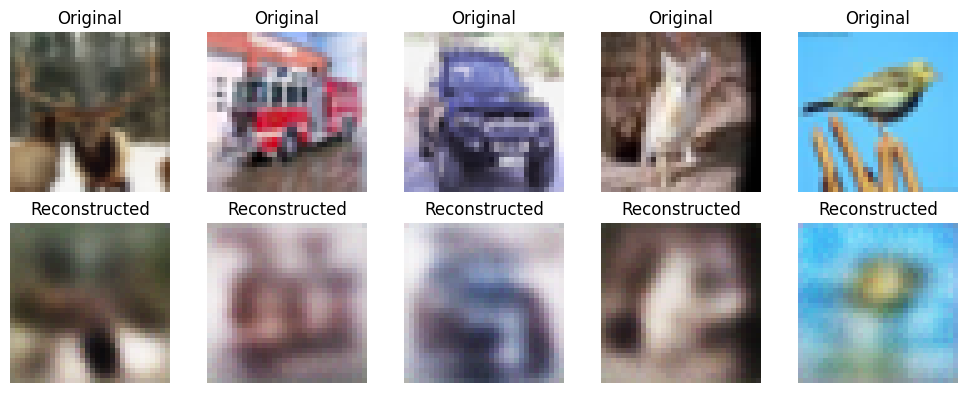

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  38/100  Batch:    1  Train Loss:  3703.43  LR:  1.63091e-05
Epoch:  38/100  Batch:  151  Train Loss:  3784.99  LR:  1.63091e-05
Epoch:  38/100  Batch:  301  Train Loss:  3745.61  LR:  1.63091e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      38 │          3705.51 │ 5.02s  │
╘═════════╧══════════════════╧════════╛


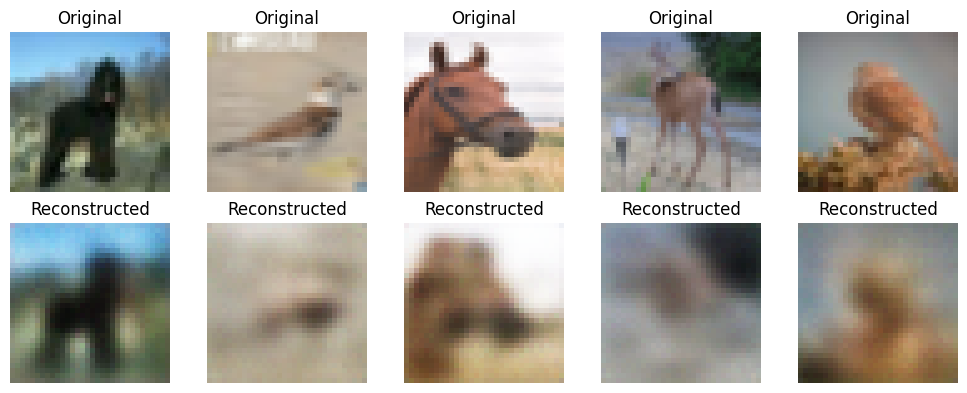

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  39/100  Batch:    1  Train Loss:  3546.12  LR:  1.54206e-05
Epoch:  39/100  Batch:  151  Train Loss:  3743.2  LR:  1.54206e-05
Epoch:  39/100  Batch:  301  Train Loss:  3760.27  LR:  1.54206e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      39 │          3666.09 │ 5.15s  │
╘═════════╧══════════════════╧════════╛


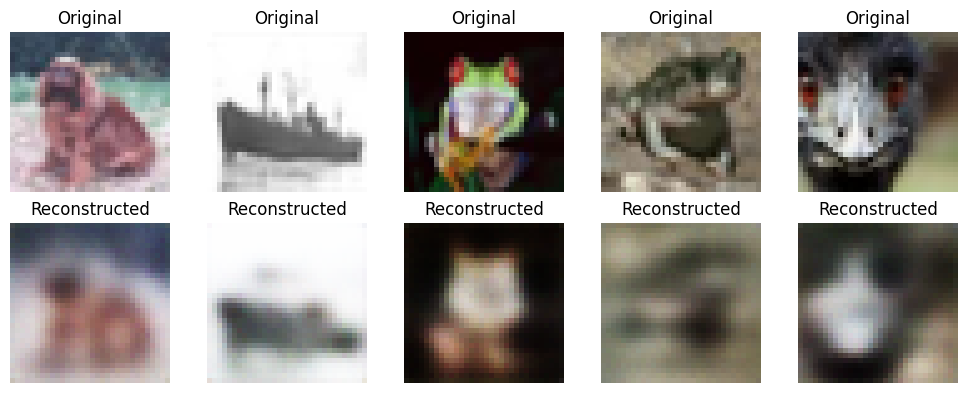

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  40/100  Batch:    1  Train Loss:  3487.02  LR:  1.45897e-05
Epoch:  40/100  Batch:  151  Train Loss:  3734.01  LR:  1.45897e-05
Epoch:  40/100  Batch:  301  Train Loss:  3737.69  LR:  1.45897e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      40 │          3737.66 │ 4.95s  │
╘═════════╧══════════════════╧════════╛


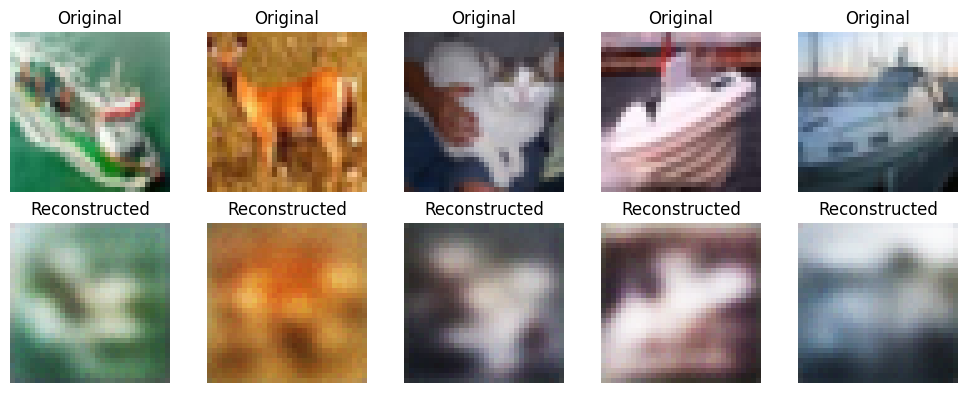

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  41/100  Batch:    1  Train Loss:  3889.66  LR:  1.38197e-05
Epoch:  41/100  Batch:  151  Train Loss:  3725.31  LR:  1.38197e-05
Epoch:  41/100  Batch:  301  Train Loss:  3734.7  LR:  1.38197e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      41 │          3607.67 │ 5.06s  │
╘═════════╧══════════════════╧════════╛


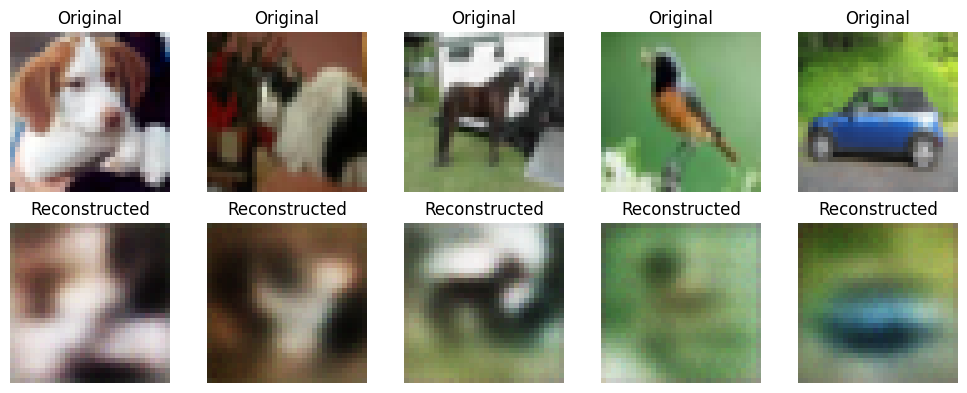

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  42/100  Batch:    1  Train Loss:  3626.97  LR:  1.31134e-05
Epoch:  42/100  Batch:  151  Train Loss:  3707.32  LR:  1.31134e-05
Epoch:  42/100  Batch:  301  Train Loss:  3719.09  LR:  1.31134e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      42 │          3639.64 │ 5.14s  │
╘═════════╧══════════════════╧════════╛


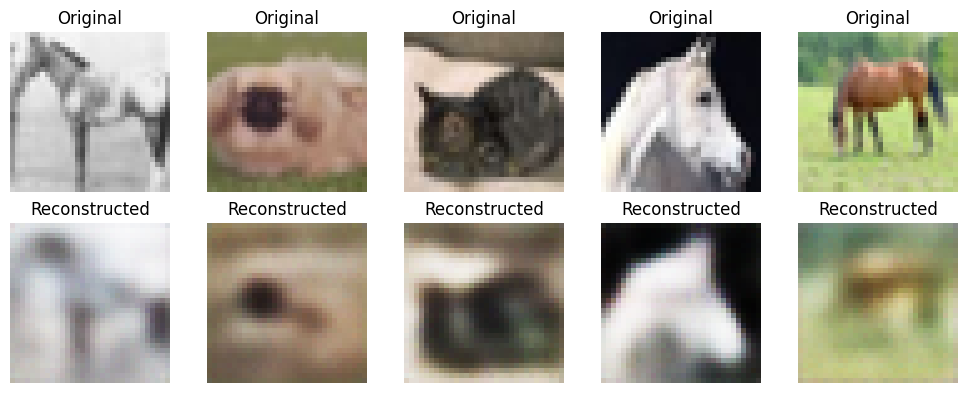

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  43/100  Batch:    1  Train Loss:  3966.94  LR:  1.24739e-05
Epoch:  43/100  Batch:  151  Train Loss:  3675.19  LR:  1.24739e-05
Epoch:  43/100  Batch:  301  Train Loss:  3707.63  LR:  1.24739e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      43 │          3606.72 │ 4.99s  │
╘═════════╧══════════════════╧════════╛


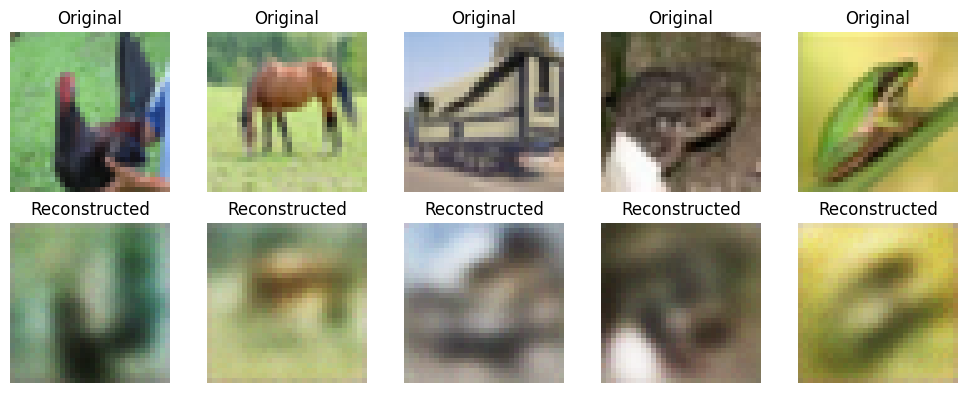

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  44/100  Batch:    1  Train Loss:  3806.23  LR:  1.19035e-05
Epoch:  44/100  Batch:  151  Train Loss:  3662.62  LR:  1.19035e-05
Epoch:  44/100  Batch:  301  Train Loss:  3690.42  LR:  1.19035e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      44 │           3620.6 │ 5.65s  │
╘═════════╧══════════════════╧════════╛


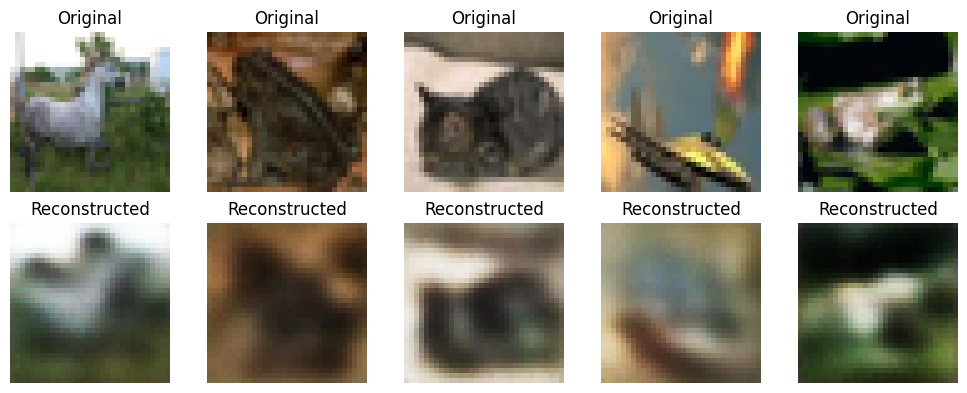

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  45/100  Batch:    1  Train Loss:  3744.48  LR:  1.14045e-05
Epoch:  45/100  Batch:  151  Train Loss:  3659.86  LR:  1.14045e-05
Epoch:  45/100  Batch:  301  Train Loss:  3672.82  LR:  1.14045e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      45 │           3558.5 │ 5.09s  │
╘═════════╧══════════════════╧════════╛


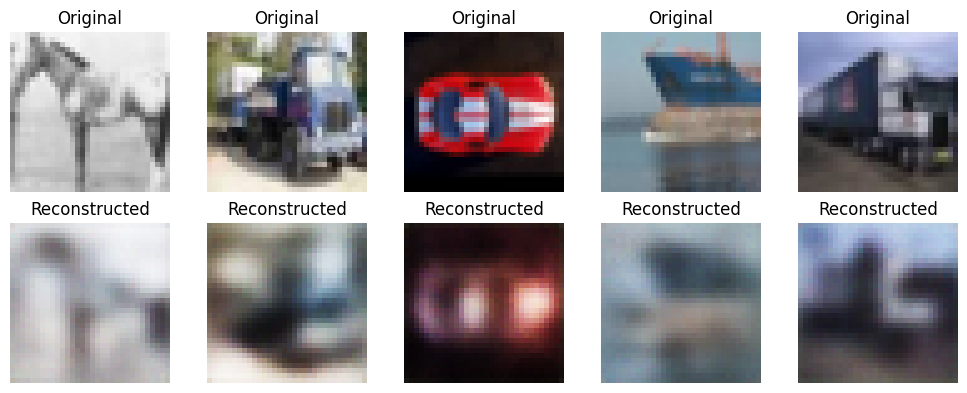

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  46/100  Batch:    1  Train Loss:  3675.74  LR:  1.09789e-05
Epoch:  46/100  Batch:  151  Train Loss:  3668.61  LR:  1.09789e-05
Epoch:  46/100  Batch:  301  Train Loss:  3643.92  LR:  1.09789e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      46 │           3559.8 │ 5.08s  │
╘═════════╧══════════════════╧════════╛


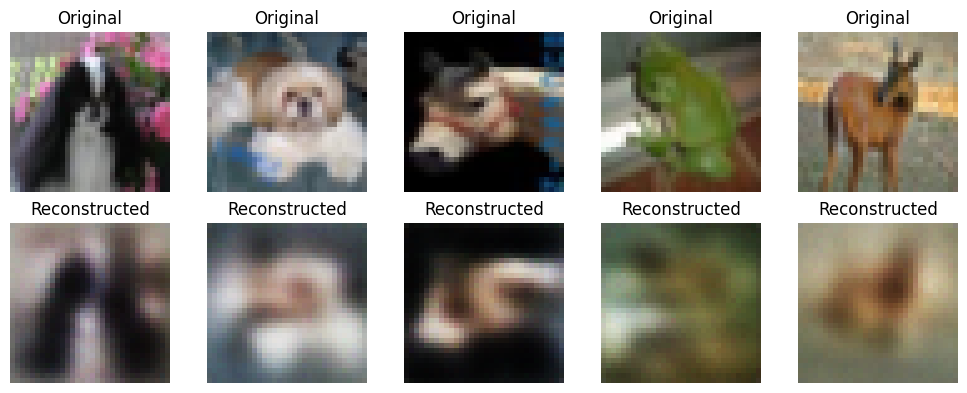

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  47/100  Batch:    1  Train Loss:  3325.13  LR:  1.06283e-05
Epoch:  47/100  Batch:  151  Train Loss:  3637.17  LR:  1.06283e-05
Epoch:  47/100  Batch:  301  Train Loss:  3631.21  LR:  1.06283e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      47 │          3571.41 │ 5.04s  │
╘═════════╧══════════════════╧════════╛


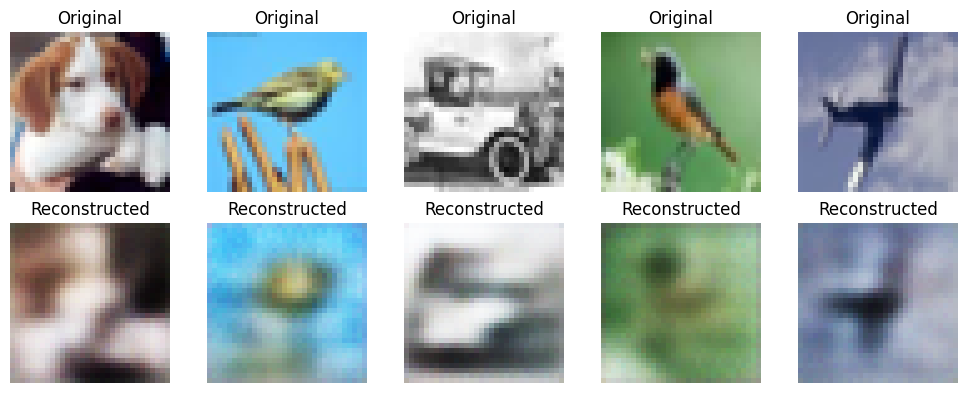

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  48/100  Batch:    1  Train Loss:  3696.25  LR:  1.03543e-05
Epoch:  48/100  Batch:  151  Train Loss:  3640.9  LR:  1.03543e-05
Epoch:  48/100  Batch:  301  Train Loss:  3619.48  LR:  1.03543e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      48 │          3527.79 │ 5.04s  │
╘═════════╧══════════════════╧════════╛


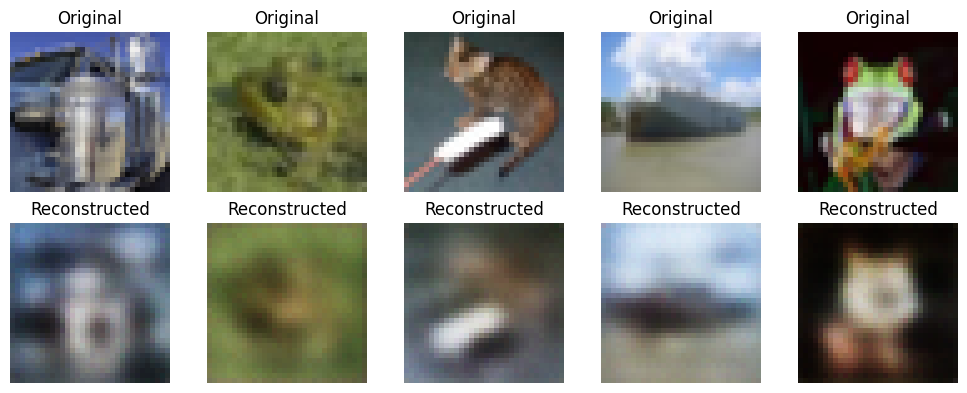

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  49/100  Batch:    1  Train Loss:  3640.56  LR:  1.01577e-05
Epoch:  49/100  Batch:  151  Train Loss:  3622.33  LR:  1.01577e-05
Epoch:  49/100  Batch:  301  Train Loss:  3619.19  LR:  1.01577e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      49 │          3562.47 │ 5.15s  │
╘═════════╧══════════════════╧════════╛


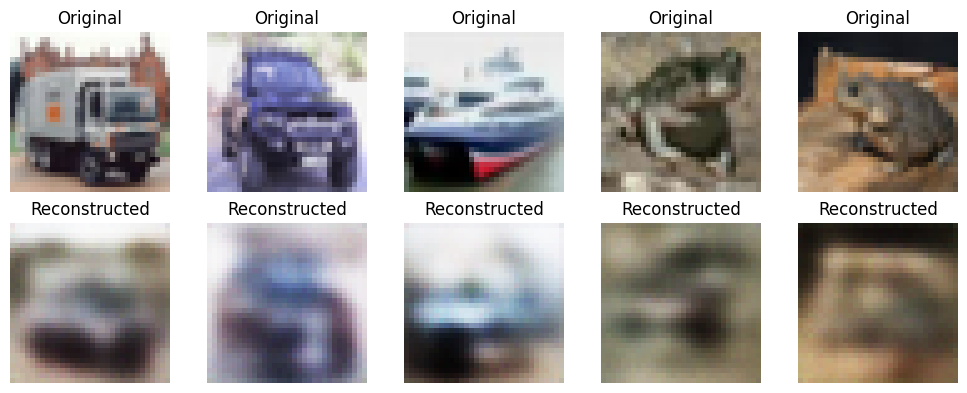

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  50/100  Batch:    1  Train Loss:  3634.13  LR:  1.00395e-05
Epoch:  50/100  Batch:  151  Train Loss:  3620.9  LR:  1.00395e-05
Epoch:  50/100  Batch:  301  Train Loss:  3613.63  LR:  1.00395e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      50 │          3536.58 │ 4.98s  │
╘═════════╧══════════════════╧════════╛


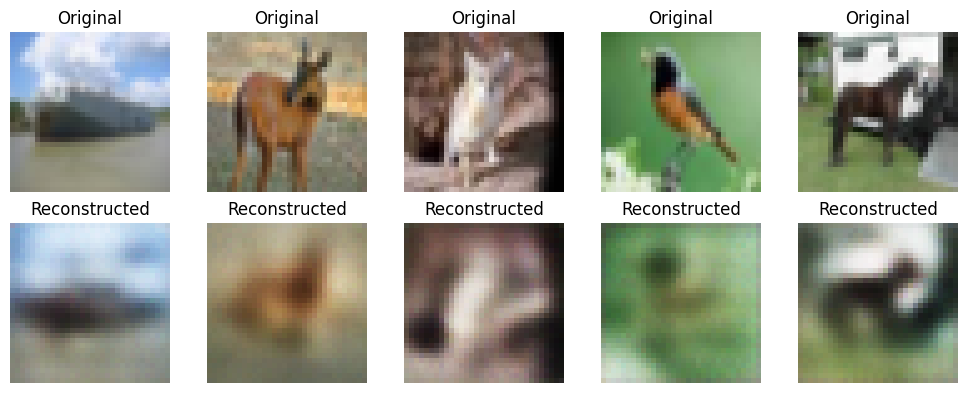

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  51/100  Batch:    1  Train Loss:  3395.07  LR:  1e-05
Epoch:  51/100  Batch:  151  Train Loss:  3609.18  LR:  1e-05
Epoch:  51/100  Batch:  301  Train Loss:  3600.39  LR:  1e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      51 │          3495.09 │ 5.50s  │
╘═════════╧══════════════════╧════════╛


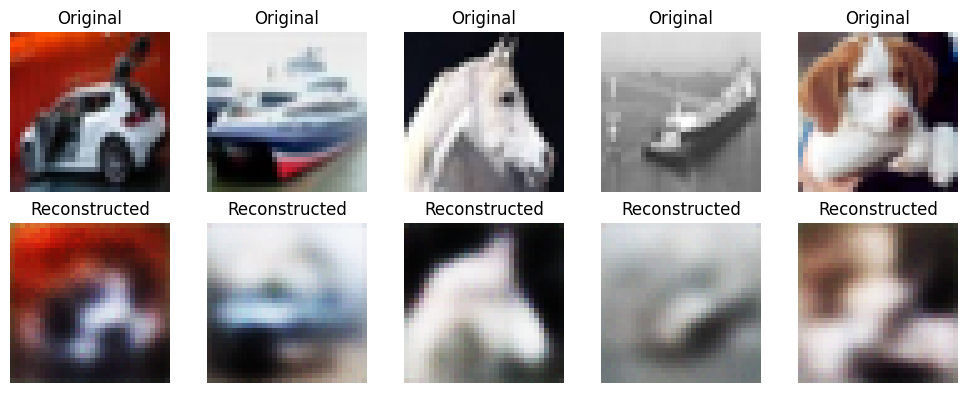

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  52/100  Batch:    1  Train Loss:  3755.25  LR:  1.00395e-05
Epoch:  52/100  Batch:  151  Train Loss:  3602.45  LR:  1.00395e-05
Epoch:  52/100  Batch:  301  Train Loss:  3596.9  LR:  1.00395e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      52 │          3525.68 │ 5.33s  │
╘═════════╧══════════════════╧════════╛


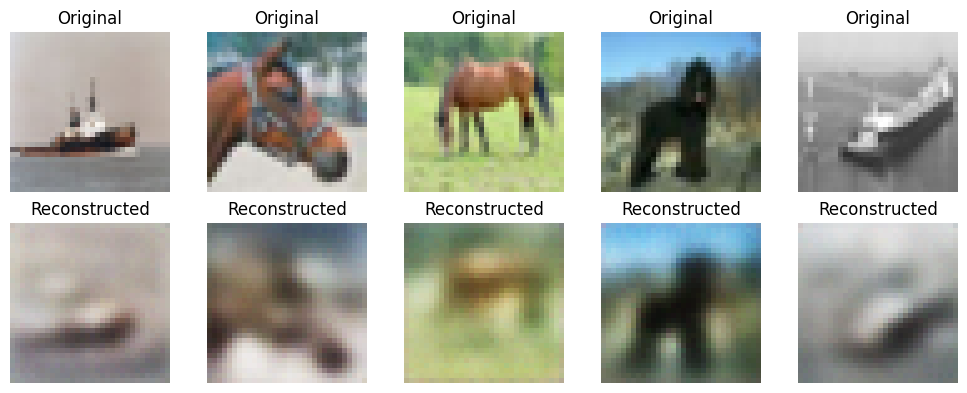

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  53/100  Batch:    1  Train Loss:  3516.16  LR:  1.01577e-05
Epoch:  53/100  Batch:  151  Train Loss:  3595.51  LR:  1.01577e-05
Epoch:  53/100  Batch:  301  Train Loss:  3572.67  LR:  1.01577e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      53 │          3513.92 │ 5.05s  │
╘═════════╧══════════════════╧════════╛


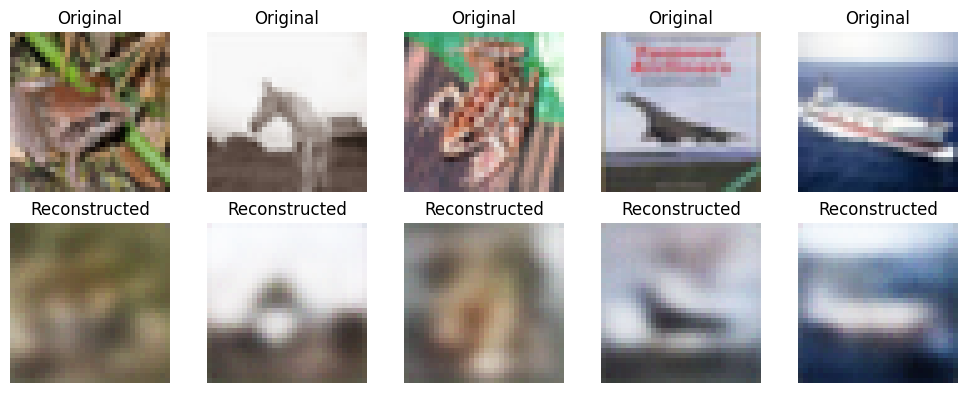

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  54/100  Batch:    1  Train Loss:  3573.9  LR:  1.03543e-05
Epoch:  54/100  Batch:  151  Train Loss:  3594.78  LR:  1.03543e-05
Epoch:  54/100  Batch:  301  Train Loss:  3592.73  LR:  1.03543e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      54 │          3508.22 │ 5.05s  │
╘═════════╧══════════════════╧════════╛


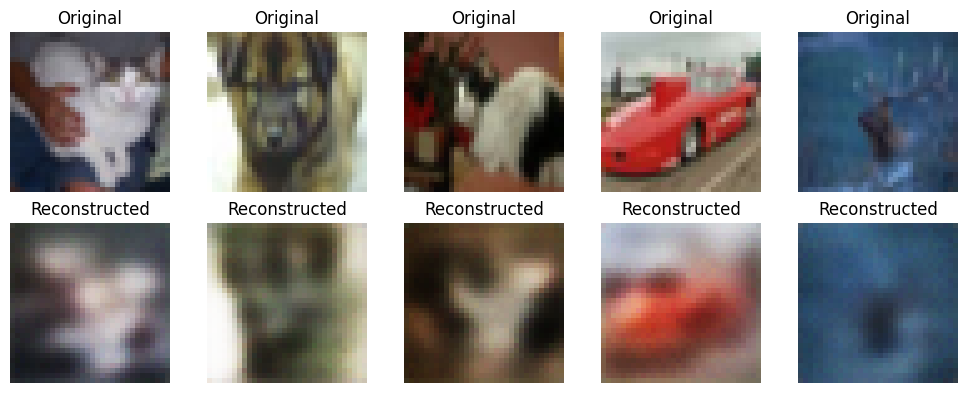

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  55/100  Batch:    1  Train Loss:  3712.53  LR:  1.06283e-05
Epoch:  55/100  Batch:  151  Train Loss:  3572.87  LR:  1.06283e-05
Epoch:  55/100  Batch:  301  Train Loss:  3569.6  LR:  1.06283e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      55 │          3518.96 │ 5.06s  │
╘═════════╧══════════════════╧════════╛


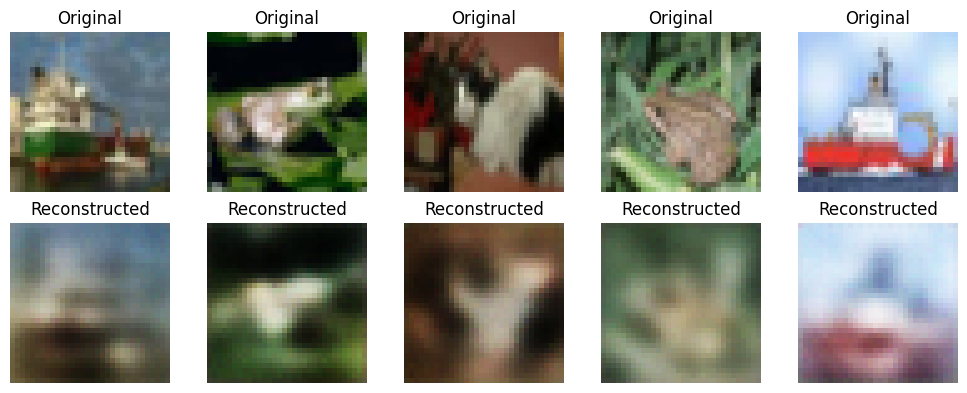

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  56/100  Batch:    1  Train Loss:  3324.41  LR:  1.09789e-05
Epoch:  56/100  Batch:  151  Train Loss:  3567.82  LR:  1.09789e-05
Epoch:  56/100  Batch:  301  Train Loss:  3574.41  LR:  1.09789e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      56 │          3482.49 │ 5.18s  │
╘═════════╧══════════════════╧════════╛


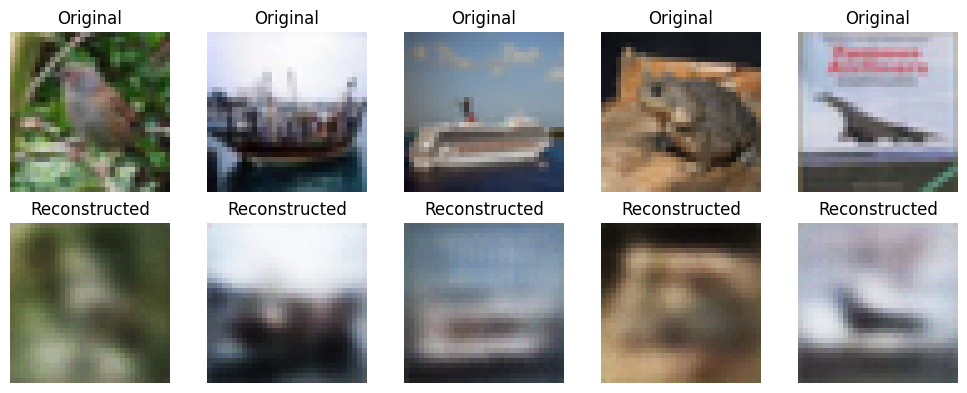

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  57/100  Batch:    1  Train Loss:  3562.42  LR:  1.14045e-05
Epoch:  57/100  Batch:  151  Train Loss:  3561.09  LR:  1.14045e-05
Epoch:  57/100  Batch:  301  Train Loss:  3561.31  LR:  1.14045e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      57 │          3447.15 │ 5.06s  │
╘═════════╧══════════════════╧════════╛


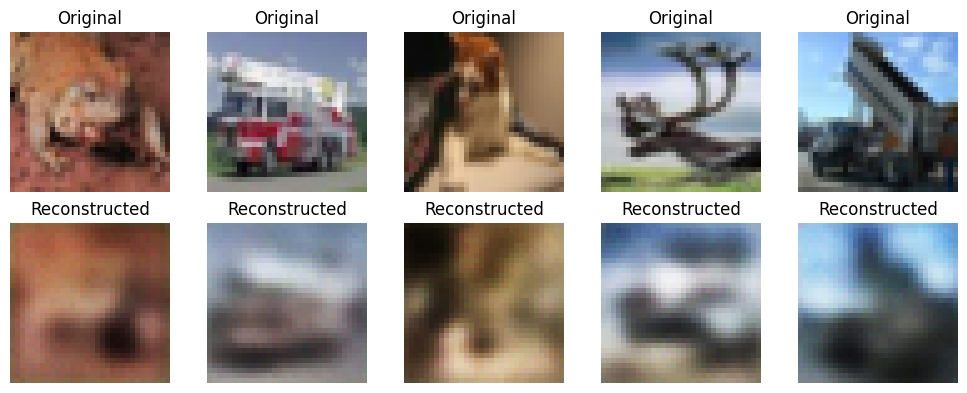

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  58/100  Batch:    1  Train Loss:  3382.35  LR:  1.19035e-05
Epoch:  58/100  Batch:  151  Train Loss:  3561.44  LR:  1.19035e-05
Epoch:  58/100  Batch:  301  Train Loss:  3546.19  LR:  1.19035e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      58 │          3446.64 │ 5.30s  │
╘═════════╧══════════════════╧════════╛


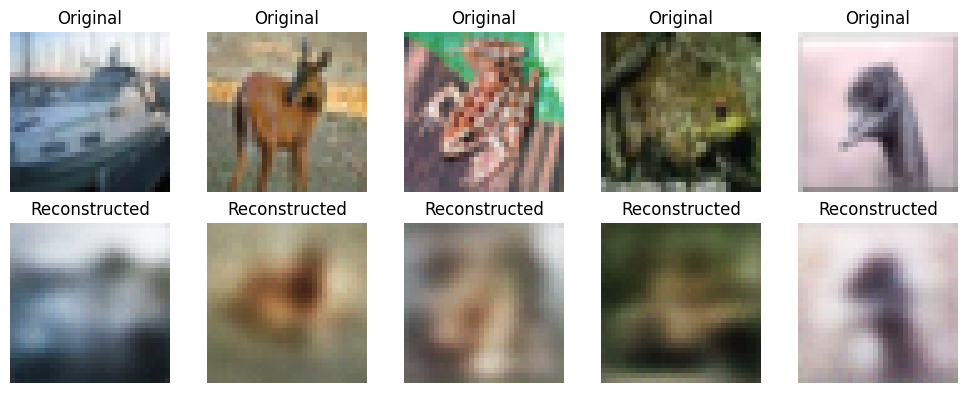

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  59/100  Batch:    1  Train Loss:  3732.25  LR:  1.24739e-05
Epoch:  59/100  Batch:  151  Train Loss:  3539.37  LR:  1.24739e-05
Epoch:  59/100  Batch:  301  Train Loss:  3557.77  LR:  1.24739e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      59 │           3485.6 │ 5.03s  │
╘═════════╧══════════════════╧════════╛


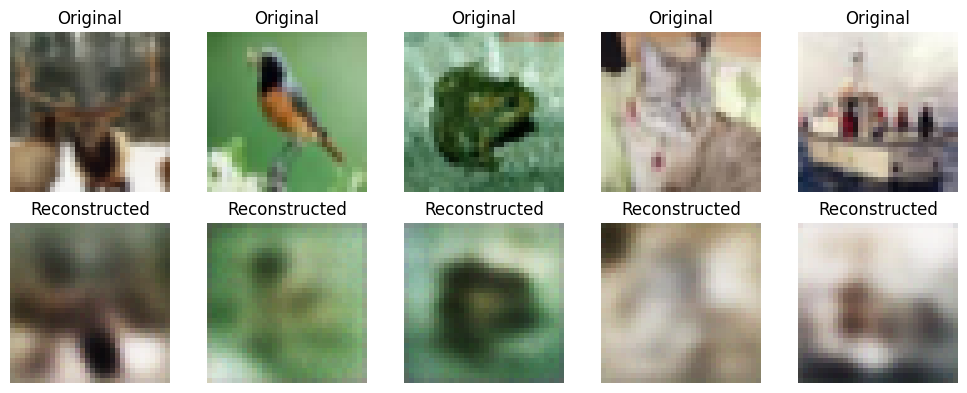

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  60/100  Batch:    1  Train Loss:  3436.19  LR:  1.31134e-05
Epoch:  60/100  Batch:  151  Train Loss:  3530.5  LR:  1.31134e-05
Epoch:  60/100  Batch:  301  Train Loss:  3552.29  LR:  1.31134e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      60 │          3475.17 │ 5.22s  │
╘═════════╧══════════════════╧════════╛


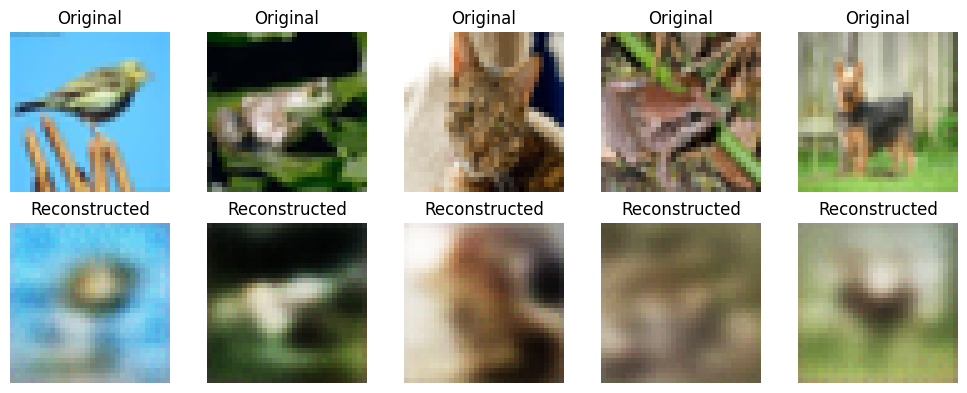

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  61/100  Batch:    1  Train Loss:  3588.95  LR:  1.38197e-05
Epoch:  61/100  Batch:  151  Train Loss:  3539.02  LR:  1.38197e-05
Epoch:  61/100  Batch:  301  Train Loss:  3525.68  LR:  1.38197e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      61 │          3453.18 │ 5.15s  │
╘═════════╧══════════════════╧════════╛


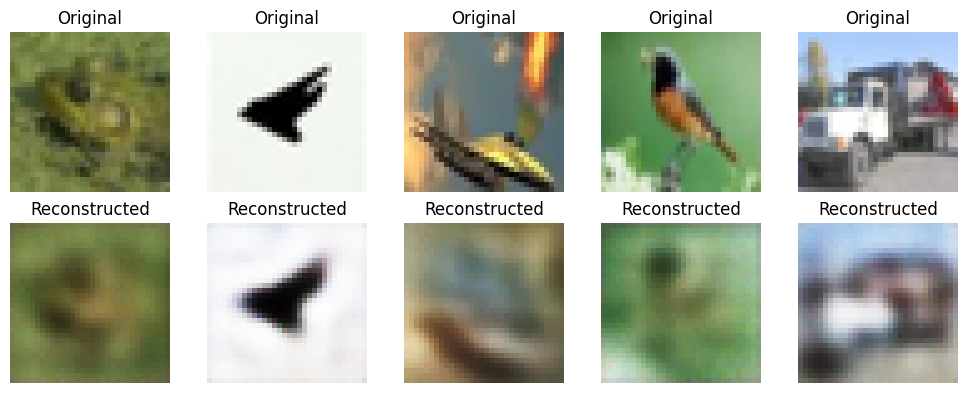

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  62/100  Batch:    1  Train Loss:  3332.96  LR:  1.45897e-05
Epoch:  62/100  Batch:  151  Train Loss:  3524.42  LR:  1.45897e-05
Epoch:  62/100  Batch:  301  Train Loss:  3517.64  LR:  1.45897e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      62 │          3498.52 │ 5.27s  │
╘═════════╧══════════════════╧════════╛


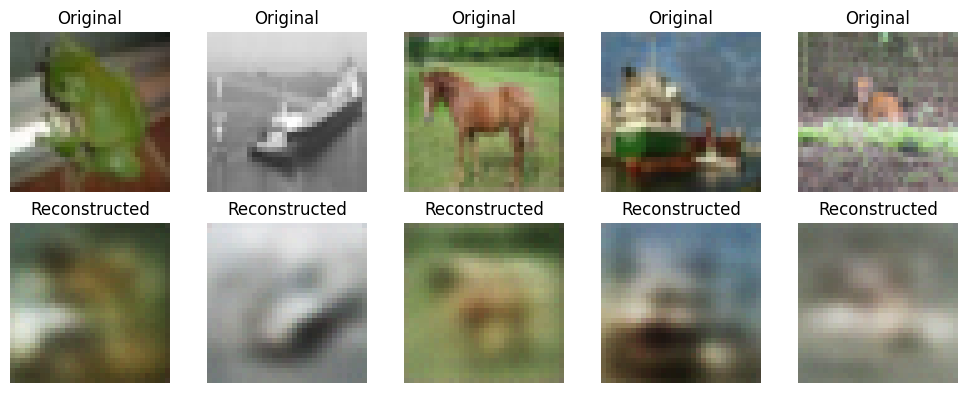

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  63/100  Batch:    1  Train Loss:  3481.12  LR:  1.54206e-05
Epoch:  63/100  Batch:  151  Train Loss:  3515.22  LR:  1.54206e-05
Epoch:  63/100  Batch:  301  Train Loss:  3518.73  LR:  1.54206e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      63 │          3495.98 │ 5.11s  │
╘═════════╧══════════════════╧════════╛


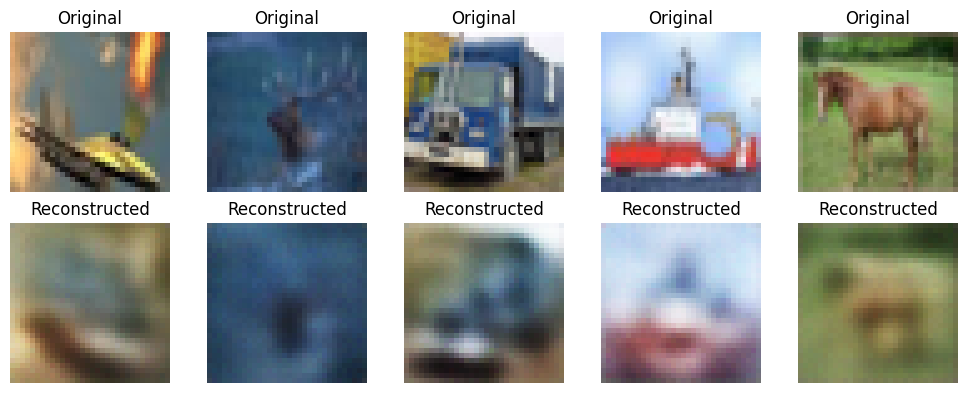

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  64/100  Batch:    1  Train Loss:  3728.43  LR:  1.63091e-05
Epoch:  64/100  Batch:  151  Train Loss:  3505.47  LR:  1.63091e-05
Epoch:  64/100  Batch:  301  Train Loss:  3486.05  LR:  1.63091e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      64 │          3456.45 │ 5.17s  │
╘═════════╧══════════════════╧════════╛


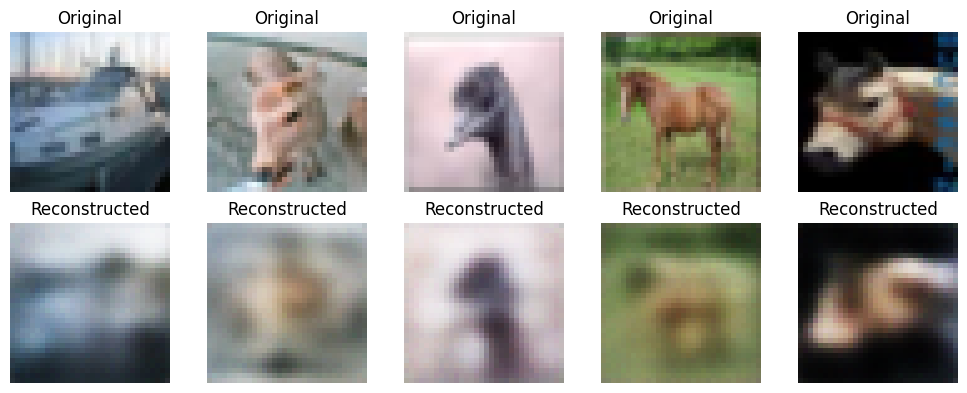

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  65/100  Batch:    1  Train Loss:  3753.02  LR:  1.72515e-05
Epoch:  65/100  Batch:  151  Train Loss:  3491.93  LR:  1.72515e-05
Epoch:  65/100  Batch:  301  Train Loss:  3491.34  LR:  1.72515e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      65 │          3418.82 │ 5.10s  │
╘═════════╧══════════════════╧════════╛


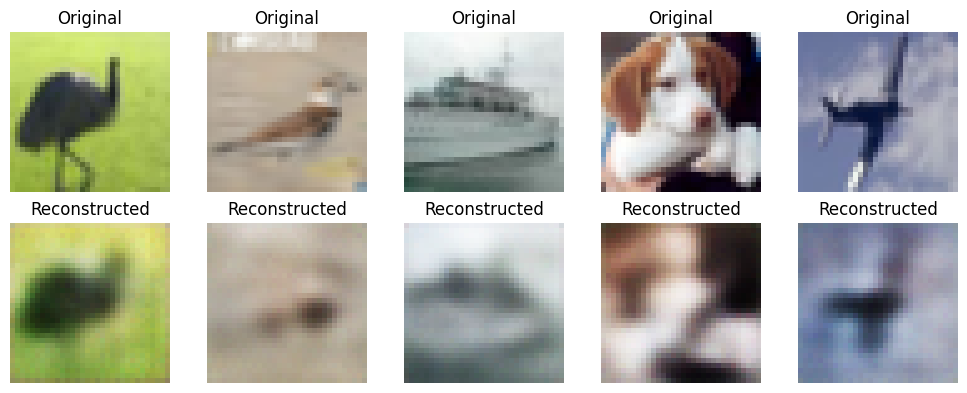

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  66/100  Batch:    1  Train Loss:  3372.24  LR:  1.82443e-05
Epoch:  66/100  Batch:  151  Train Loss:  3475.96  LR:  1.82443e-05
Epoch:  66/100  Batch:  301  Train Loss:  3488.02  LR:  1.82443e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      66 │          3636.05 │ 5.40s  │
╘═════════╧══════════════════╧════════╛


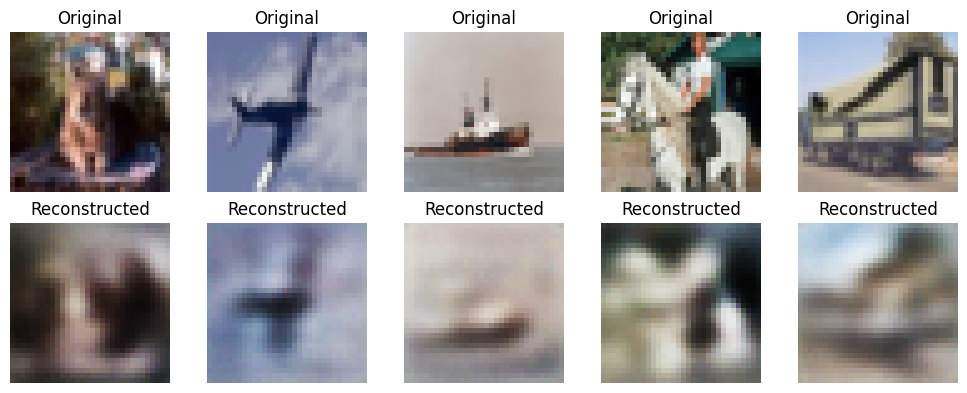

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  67/100  Batch:    1  Train Loss:  3347.3  LR:  1.92835e-05
Epoch:  67/100  Batch:  151  Train Loss:  3485.47  LR:  1.92835e-05
Epoch:  67/100  Batch:  301  Train Loss:  3490.91  LR:  1.92835e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      67 │          3494.86 │ 5.10s  │
╘═════════╧══════════════════╧════════╛


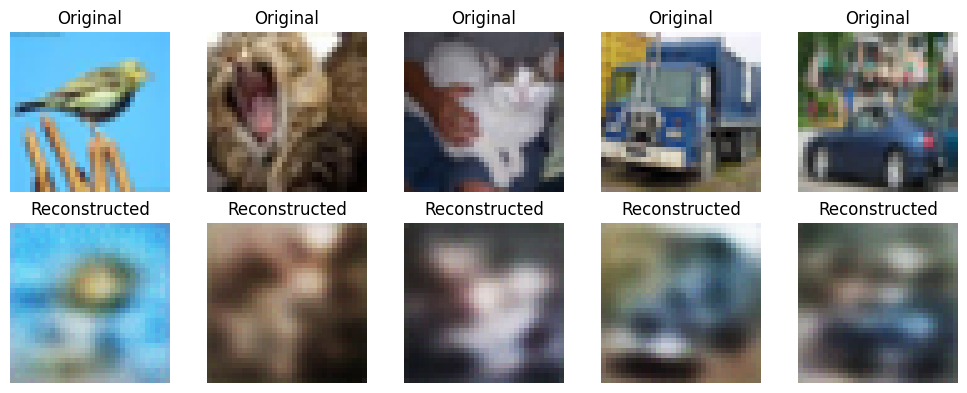

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  68/100  Batch:    1  Train Loss:  3416.81  LR:  2.03649e-05
Epoch:  68/100  Batch:  151  Train Loss:  3463.16  LR:  2.03649e-05
Epoch:  68/100  Batch:  301  Train Loss:  3473.89  LR:  2.03649e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      68 │          3394.73 │ 5.13s  │
╘═════════╧══════════════════╧════════╛


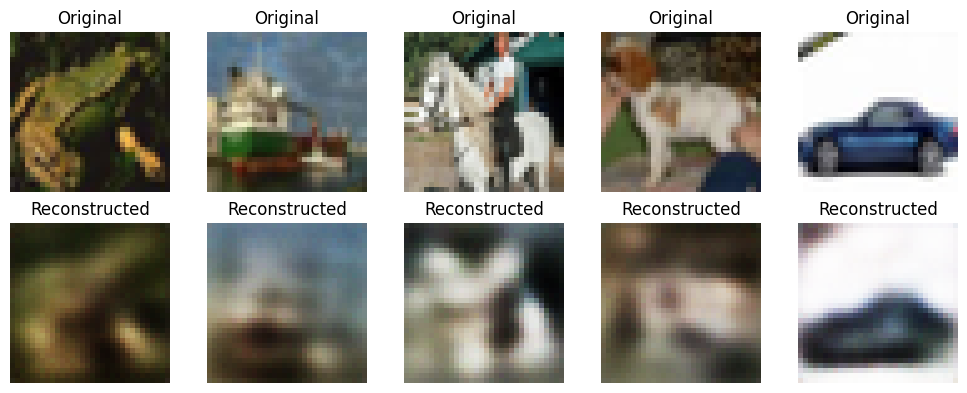

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  69/100  Batch:    1  Train Loss:  3511.14  LR:  2.14844e-05
Epoch:  69/100  Batch:  151  Train Loss:  3475.64  LR:  2.14844e-05
Epoch:  69/100  Batch:  301  Train Loss:  3463.2  LR:  2.14844e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      69 │          3367.55 │ 5.18s  │
╘═════════╧══════════════════╧════════╛


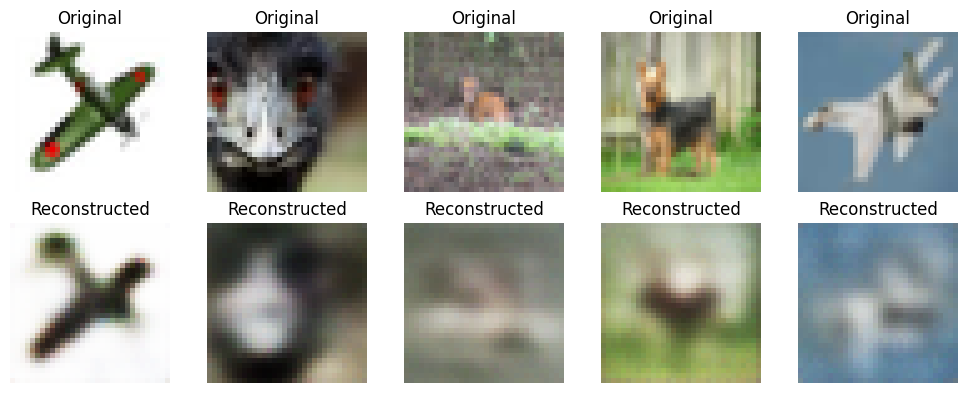

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  70/100  Batch:    1  Train Loss:  3547.23  LR:  2.26375e-05
Epoch:  70/100  Batch:  151  Train Loss:  3466.18  LR:  2.26375e-05
Epoch:  70/100  Batch:  301  Train Loss:  3442.29  LR:  2.26375e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      70 │          3437.47 │ 5.10s  │
╘═════════╧══════════════════╧════════╛


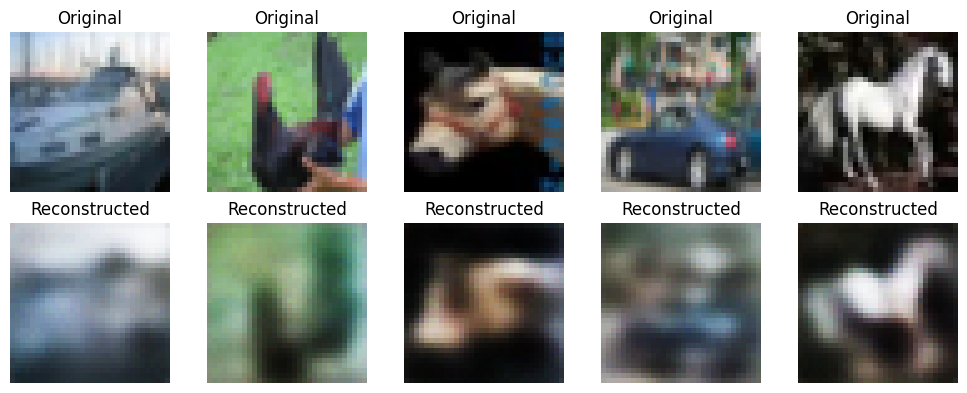

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  71/100  Batch:    1  Train Loss:  3182.51  LR:  2.38197e-05
Epoch:  71/100  Batch:  151  Train Loss:  3426.39  LR:  2.38197e-05
Epoch:  71/100  Batch:  301  Train Loss:  3454.69  LR:  2.38197e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      71 │          3371.01 │ 5.18s  │
╘═════════╧══════════════════╧════════╛


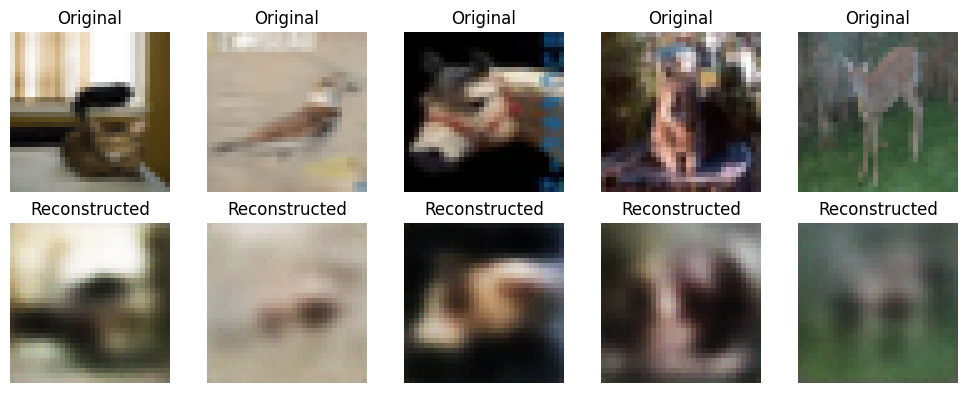

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  72/100  Batch:    1  Train Loss:  3324.51  LR:  2.50262e-05
Epoch:  72/100  Batch:  151  Train Loss:  3448.78  LR:  2.50262e-05
Epoch:  72/100  Batch:  301  Train Loss:  3440.19  LR:  2.50262e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      72 │          3398.99 │ 5.20s  │
╘═════════╧══════════════════╧════════╛


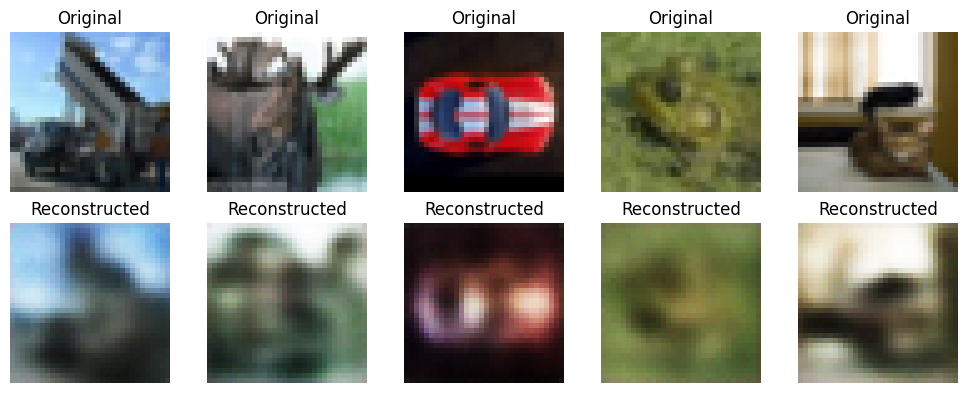

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  73/100  Batch:    1  Train Loss:  3471.65  LR:  2.62524e-05
Epoch:  73/100  Batch:  151  Train Loss:  3423.44  LR:  2.62524e-05
Epoch:  73/100  Batch:  301  Train Loss:  3416.28  LR:  2.62524e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      73 │          3405.47 │ 5.02s  │
╘═════════╧══════════════════╧════════╛


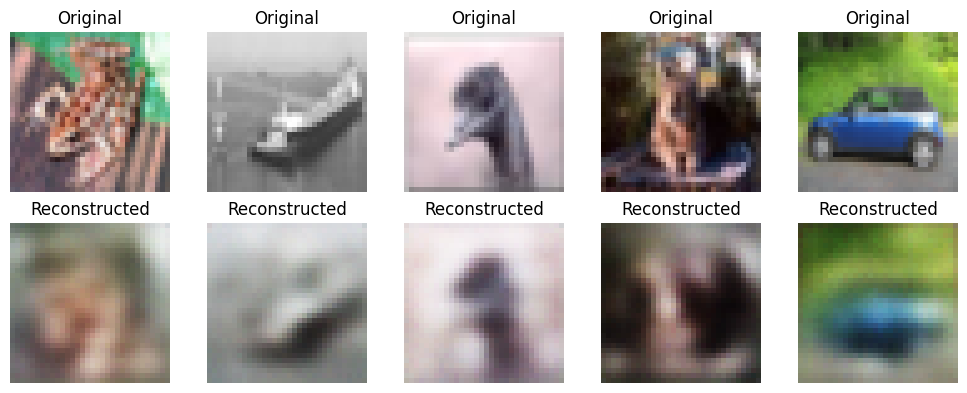

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  74/100  Batch:    1  Train Loss:  3393.66  LR:  2.74933e-05
Epoch:  74/100  Batch:  151  Train Loss:  3392.68  LR:  2.74933e-05
Epoch:  74/100  Batch:  301  Train Loss:  3411.36  LR:  2.74933e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      74 │          3415.91 │ 5.15s  │
╘═════════╧══════════════════╧════════╛


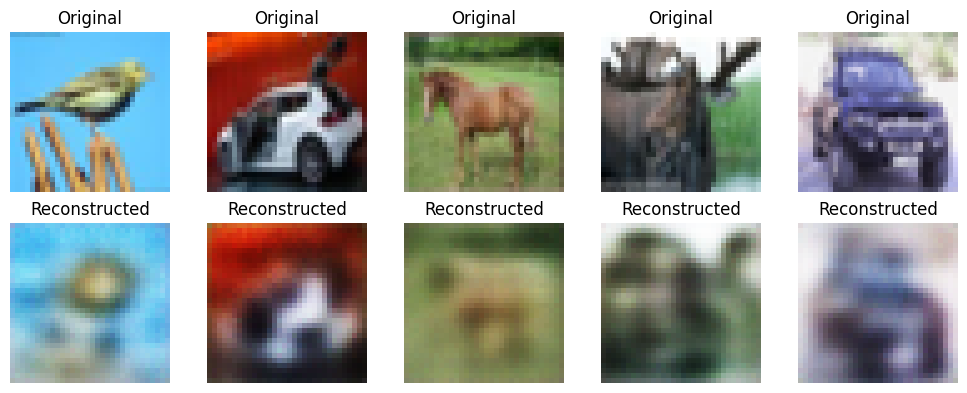

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  75/100  Batch:    1  Train Loss:  3772.23  LR:  2.87442e-05
Epoch:  75/100  Batch:  151  Train Loss:  3396.82  LR:  2.87442e-05
Epoch:  75/100  Batch:  301  Train Loss:  3421.33  LR:  2.87442e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      75 │          3407.54 │ 5.09s  │
╘═════════╧══════════════════╧════════╛


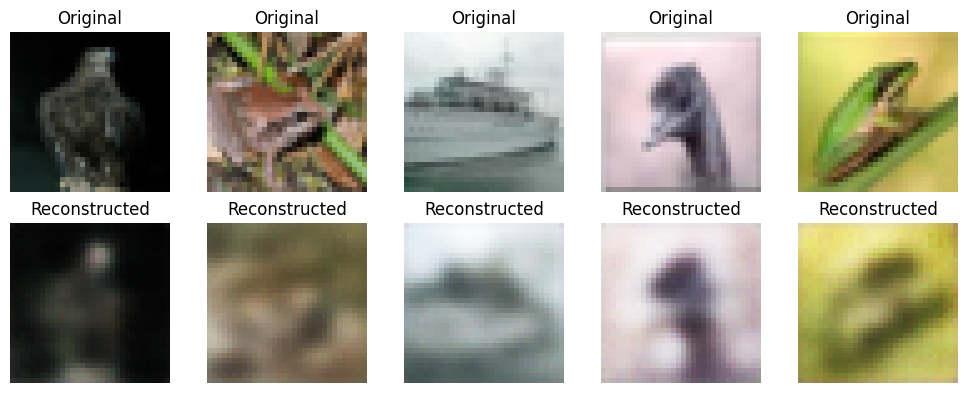

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  76/100  Batch:    1  Train Loss:  3298.39  LR:  3e-05
Epoch:  76/100  Batch:  151  Train Loss:  3394.67  LR:  3e-05
Epoch:  76/100  Batch:  301  Train Loss:  3367.66  LR:  3e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      76 │          3400.92 │ 5.10s  │
╘═════════╧══════════════════╧════════╛


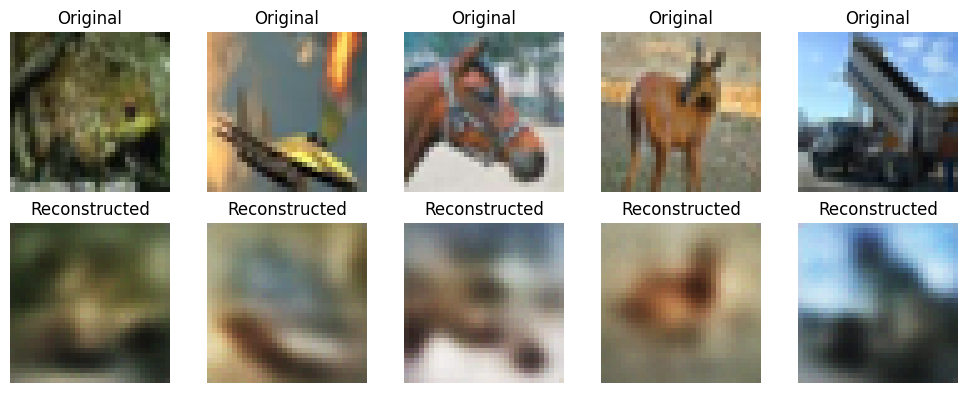

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  77/100  Batch:    1  Train Loss:  3244.55  LR:  3.12558e-05
Epoch:  77/100  Batch:  151  Train Loss:  3369.63  LR:  3.12558e-05
Epoch:  77/100  Batch:  301  Train Loss:  3376.84  LR:  3.12558e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      77 │          3501.09 │ 5.14s  │
╘═════════╧══════════════════╧════════╛


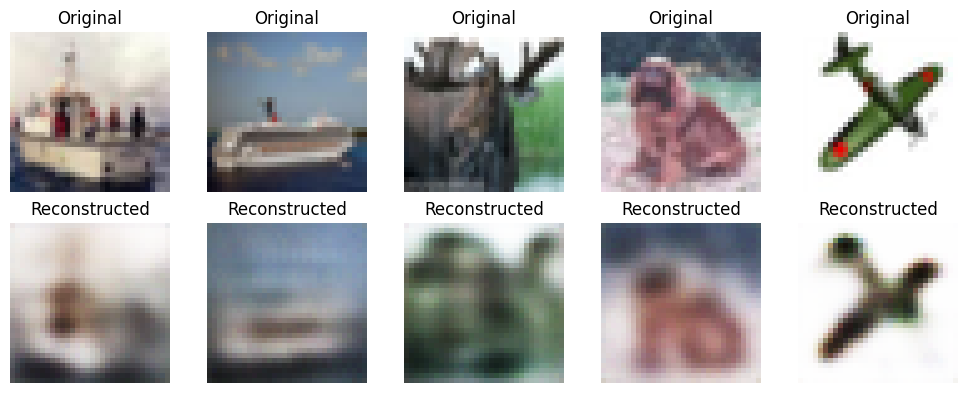

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  78/100  Batch:    1  Train Loss:  3604.64  LR:  3.25067e-05
Epoch:  78/100  Batch:  151  Train Loss:  3378.99  LR:  3.25067e-05
Epoch:  78/100  Batch:  301  Train Loss:  3355.89  LR:  3.25067e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      78 │          3317.55 │ 5.18s  │
╘═════════╧══════════════════╧════════╛


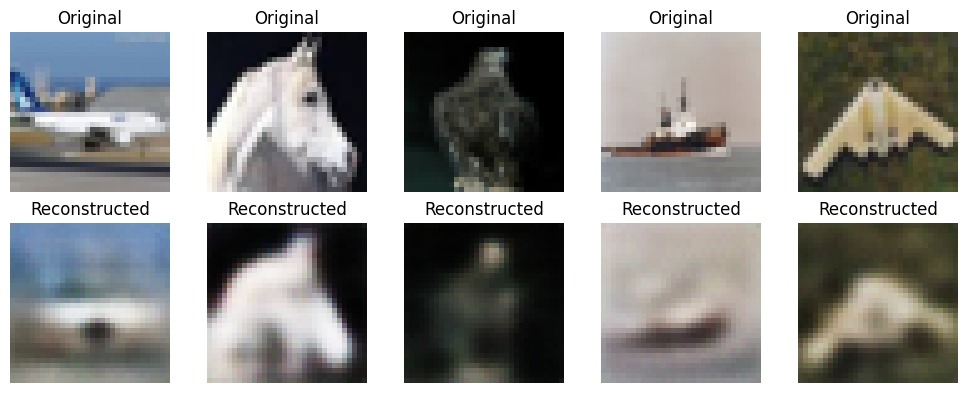

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  79/100  Batch:    1  Train Loss:  3169.08  LR:  3.37476e-05
Epoch:  79/100  Batch:  151  Train Loss:  3366.89  LR:  3.37476e-05
Epoch:  79/100  Batch:  301  Train Loss:  3333.73  LR:  3.37476e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      79 │          3330.94 │ 5.03s  │
╘═════════╧══════════════════╧════════╛


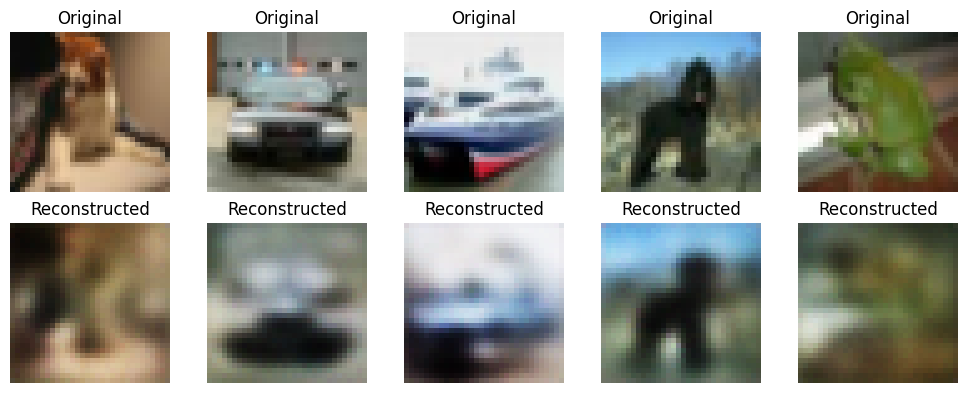

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  80/100  Batch:    1  Train Loss:  3200.91  LR:  3.49738e-05
Epoch:  80/100  Batch:  151  Train Loss:  3315.24  LR:  3.49738e-05
Epoch:  80/100  Batch:  301  Train Loss:  3333.36  LR:  3.49738e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      80 │          3407.54 │ 5.22s  │
╘═════════╧══════════════════╧════════╛


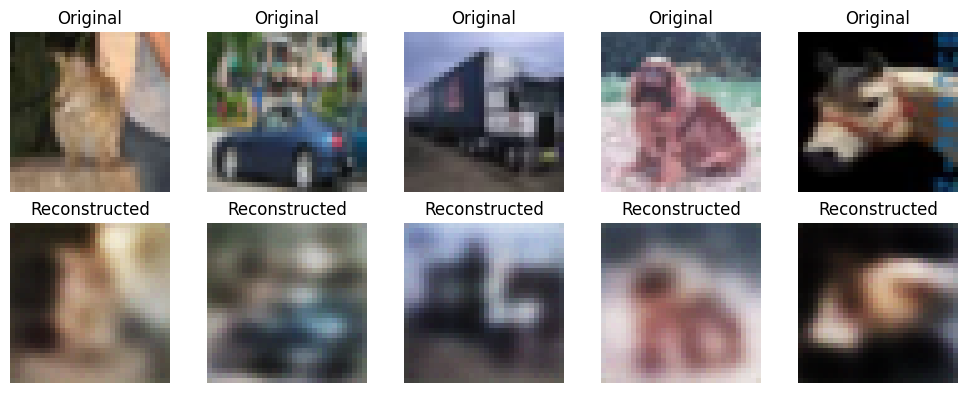

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  81/100  Batch:    1  Train Loss:  3235.41  LR:  3.61803e-05
Epoch:  81/100  Batch:  151  Train Loss:  3317.28  LR:  3.61803e-05
Epoch:  81/100  Batch:  301  Train Loss:  3291.72  LR:  3.61803e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      81 │          3309.94 │ 5.06s  │
╘═════════╧══════════════════╧════════╛


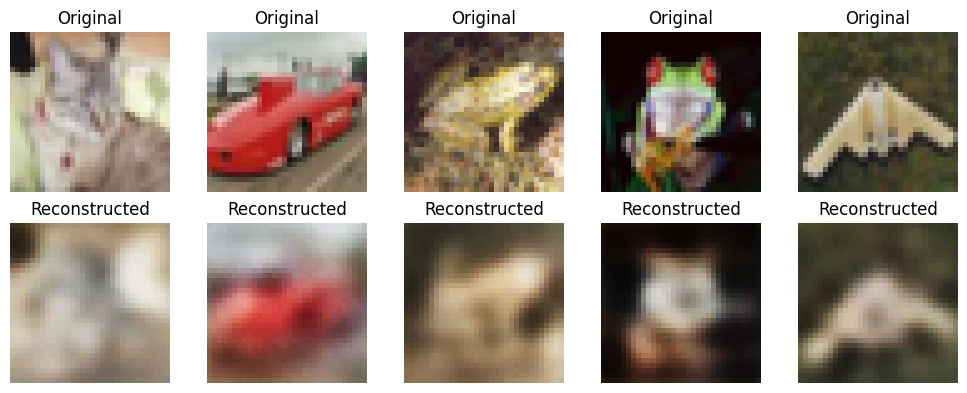

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  82/100  Batch:    1  Train Loss:  3549.45  LR:  3.73625e-05
Epoch:  82/100  Batch:  151  Train Loss:  3302.64  LR:  3.73625e-05
Epoch:  82/100  Batch:  301  Train Loss:  3282.96  LR:  3.73625e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      82 │          3353.52 │ 5.20s  │
╘═════════╧══════════════════╧════════╛


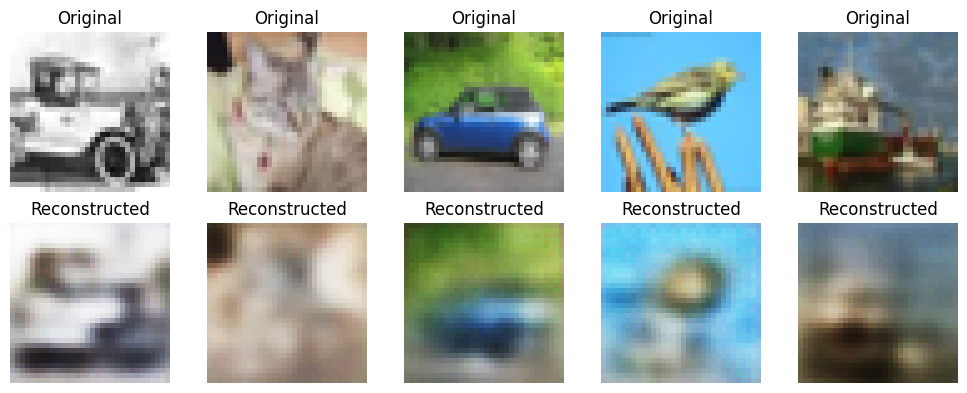

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  83/100  Batch:    1  Train Loss:  3133.69  LR:  3.85156e-05
Epoch:  83/100  Batch:  151  Train Loss:  3284.49  LR:  3.85156e-05
Epoch:  83/100  Batch:  301  Train Loss:  3271.07  LR:  3.85156e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      83 │          3264.99 │ 4.99s  │
╘═════════╧══════════════════╧════════╛


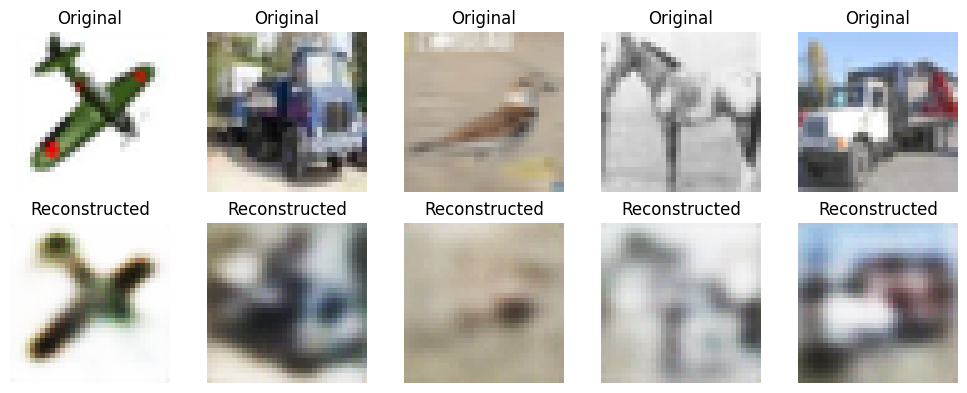

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  84/100  Batch:    1  Train Loss:  3094.12  LR:  3.96351e-05
Epoch:  84/100  Batch:  151  Train Loss:  3274.73  LR:  3.96351e-05
Epoch:  84/100  Batch:  301  Train Loss:  3260.93  LR:  3.96351e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      84 │          3326.57 │ 5.14s  │
╘═════════╧══════════════════╧════════╛


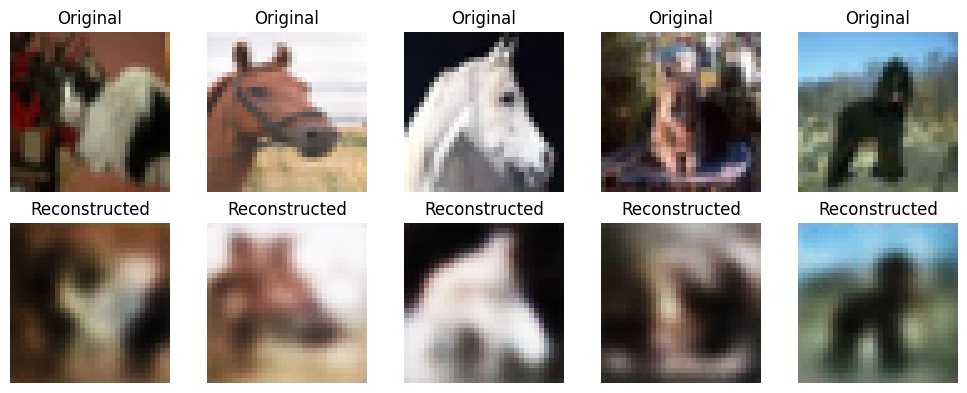

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  85/100  Batch:    1  Train Loss:  3298.26  LR:  4.07165e-05
Epoch:  85/100  Batch:  151  Train Loss:  3262.72  LR:  4.07165e-05
Epoch:  85/100  Batch:  301  Train Loss:  3232.09  LR:  4.07165e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      85 │          3270.87 │ 5.10s  │
╘═════════╧══════════════════╧════════╛


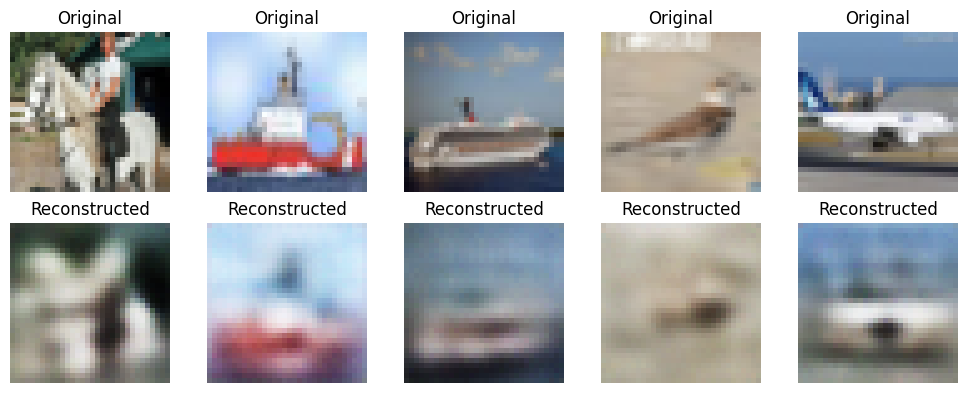

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  86/100  Batch:    1  Train Loss:  3199.53  LR:  4.17557e-05
Epoch:  86/100  Batch:  151  Train Loss:  3223.62  LR:  4.17557e-05
Epoch:  86/100  Batch:  301  Train Loss:  3228.7  LR:  4.17557e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      86 │          3370.04 │ 5.35s  │
╘═════════╧══════════════════╧════════╛


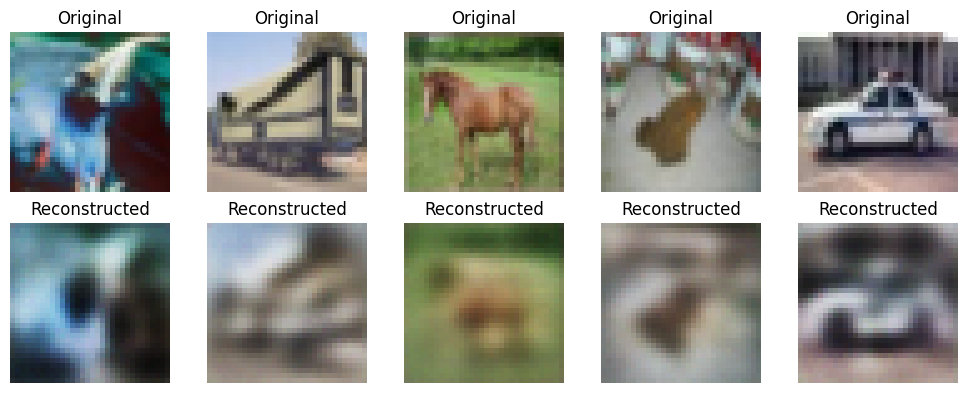

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  87/100  Batch:    1  Train Loss:  2937.32  LR:  4.27485e-05
Epoch:  87/100  Batch:  151  Train Loss:  3216.23  LR:  4.27485e-05
Epoch:  87/100  Batch:  301  Train Loss:  3211.49  LR:  4.27485e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      87 │          3292.11 │ 5.08s  │
╘═════════╧══════════════════╧════════╛


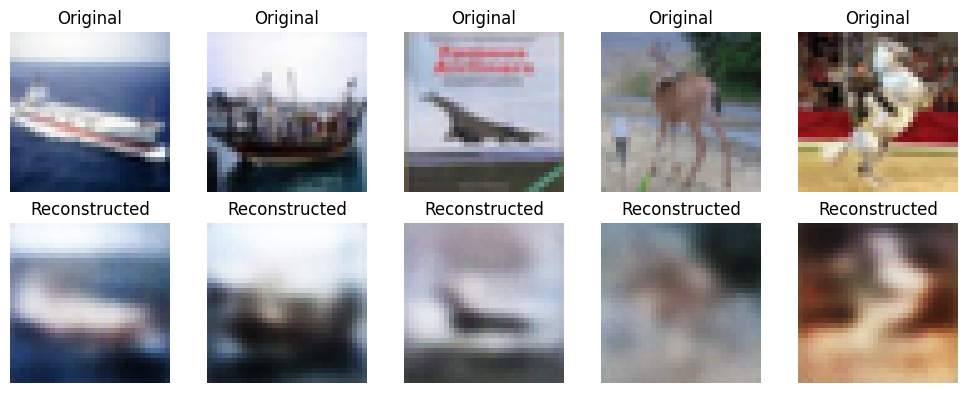

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  88/100  Batch:    1  Train Loss:  3350.72  LR:  4.36909e-05
Epoch:  88/100  Batch:  151  Train Loss:  3212.55  LR:  4.36909e-05
Epoch:  88/100  Batch:  301  Train Loss:  3205.53  LR:  4.36909e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      88 │          3295.34 │ 5.22s  │
╘═════════╧══════════════════╧════════╛


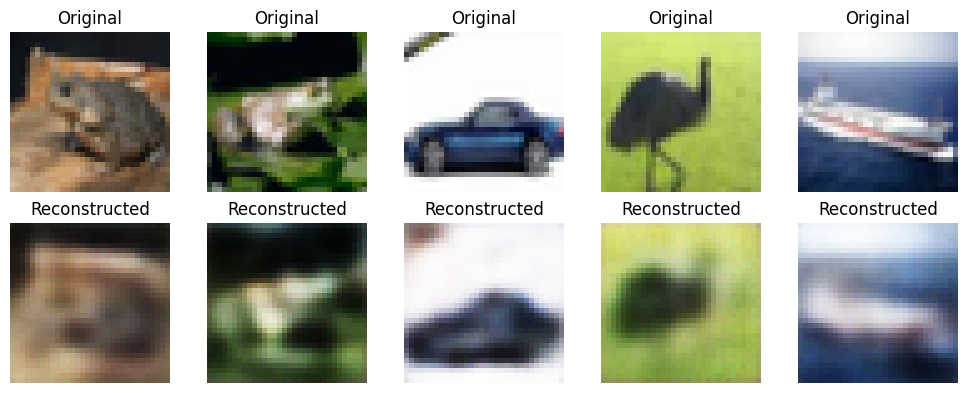

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  89/100  Batch:    1  Train Loss:  3291.29  LR:  4.45794e-05
Epoch:  89/100  Batch:  151  Train Loss:  3171.35  LR:  4.45794e-05
Epoch:  89/100  Batch:  301  Train Loss:  3167.61  LR:  4.45794e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      89 │          3325.63 │ 5.06s  │
╘═════════╧══════════════════╧════════╛


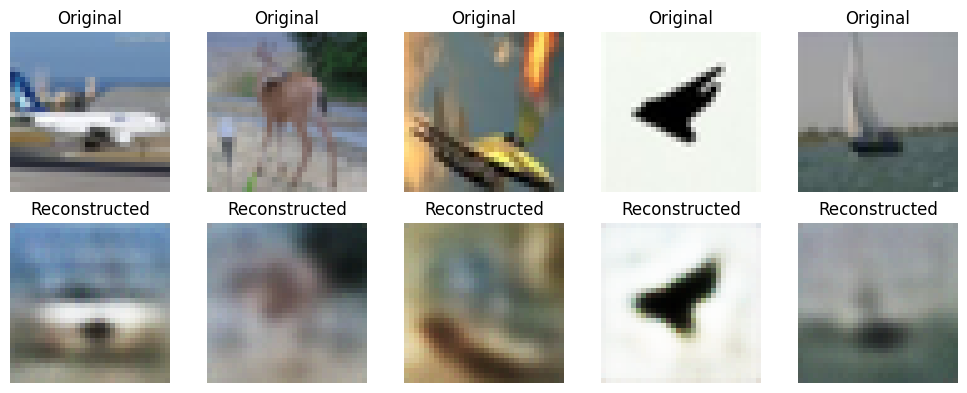

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  90/100  Batch:    1  Train Loss:  2955.63  LR:  4.54103e-05
Epoch:  90/100  Batch:  151  Train Loss:  3156.91  LR:  4.54103e-05
Epoch:  90/100  Batch:  301  Train Loss:  3171.56  LR:  4.54103e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      90 │           3206.2 │ 5.15s  │
╘═════════╧══════════════════╧════════╛


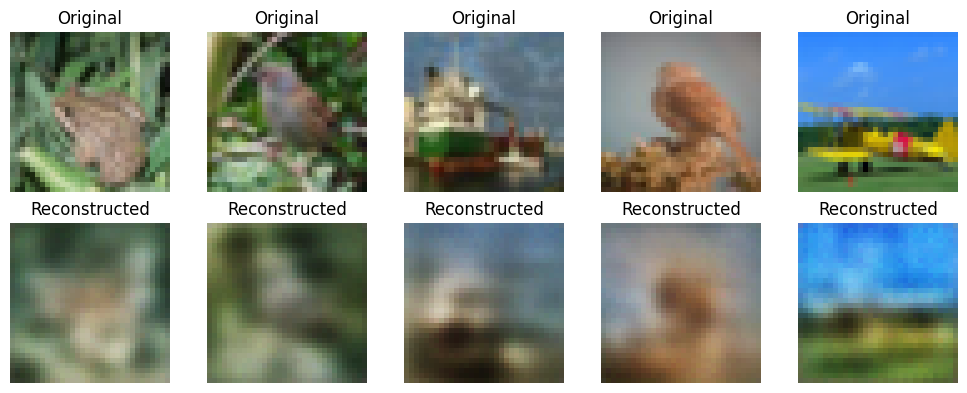

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  91/100  Batch:    1  Train Loss:  3118.71  LR:  4.61803e-05
Epoch:  91/100  Batch:  151  Train Loss:  3145.8  LR:  4.61803e-05
Epoch:  91/100  Batch:  301  Train Loss:  3166.04  LR:  4.61803e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      91 │          3275.24 │ 5.06s  │
╘═════════╧══════════════════╧════════╛


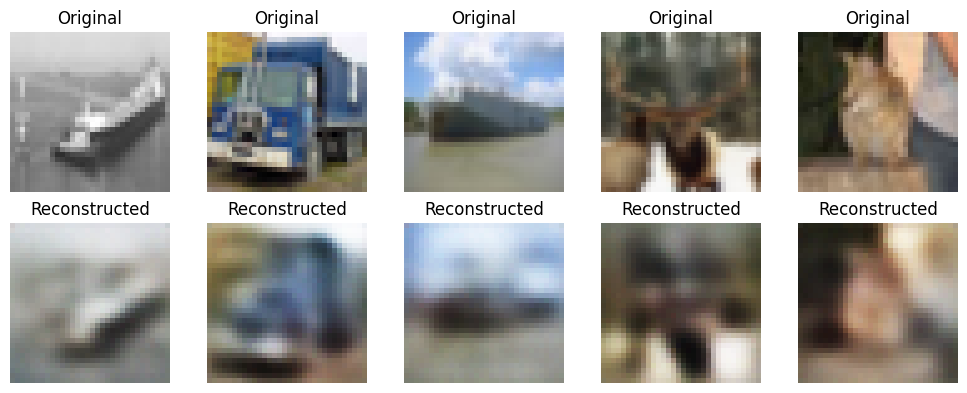

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  92/100  Batch:    1  Train Loss:  3119.68  LR:  4.68866e-05
Epoch:  92/100  Batch:  151  Train Loss:  3151.46  LR:  4.68866e-05
Epoch:  92/100  Batch:  301  Train Loss:  3126.53  LR:  4.68866e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      92 │          3160.33 │ 5.41s  │
╘═════════╧══════════════════╧════════╛


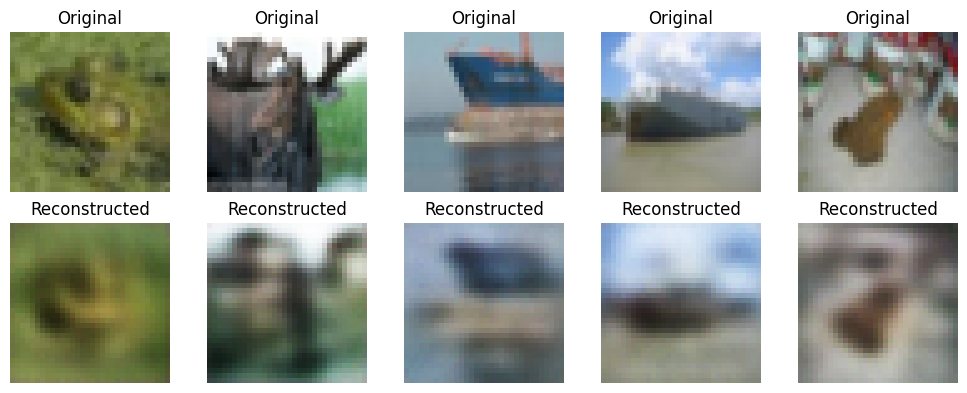

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  93/100  Batch:    1  Train Loss:  3146.76  LR:  4.75261e-05
Epoch:  93/100  Batch:  151  Train Loss:  3117.18  LR:  4.75261e-05
Epoch:  93/100  Batch:  301  Train Loss:  3123.18  LR:  4.75261e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      93 │          3143.51 │ 5.07s  │
╘═════════╧══════════════════╧════════╛


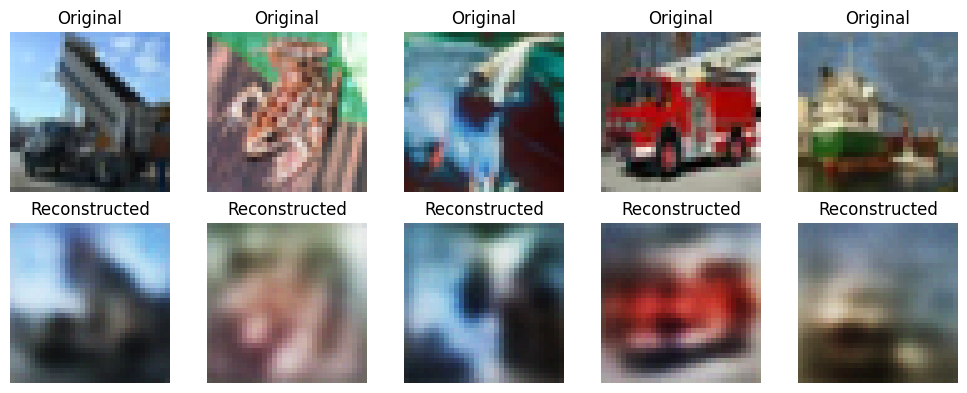

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  94/100  Batch:    1  Train Loss:  3144.78  LR:  4.80965e-05
Epoch:  94/100  Batch:  151  Train Loss:  3087.18  LR:  4.80965e-05
Epoch:  94/100  Batch:  301  Train Loss:  3091.32  LR:  4.80965e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      94 │          3296.87 │ 5.27s  │
╘═════════╧══════════════════╧════════╛


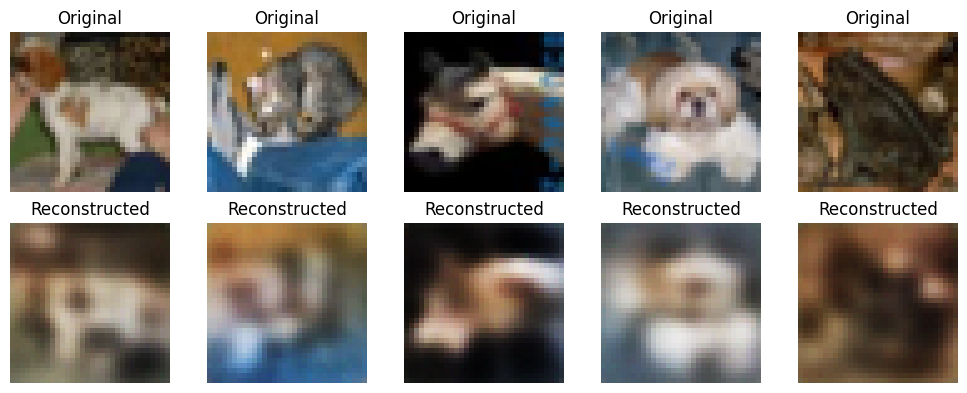

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  95/100  Batch:    1  Train Loss:  3012.27  LR:  4.85955e-05
Epoch:  95/100  Batch:  151  Train Loss:  3101.55  LR:  4.85955e-05
Epoch:  95/100  Batch:  301  Train Loss:  3079.44  LR:  4.85955e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      95 │          3083.99 │ 5.14s  │
╘═════════╧══════════════════╧════════╛


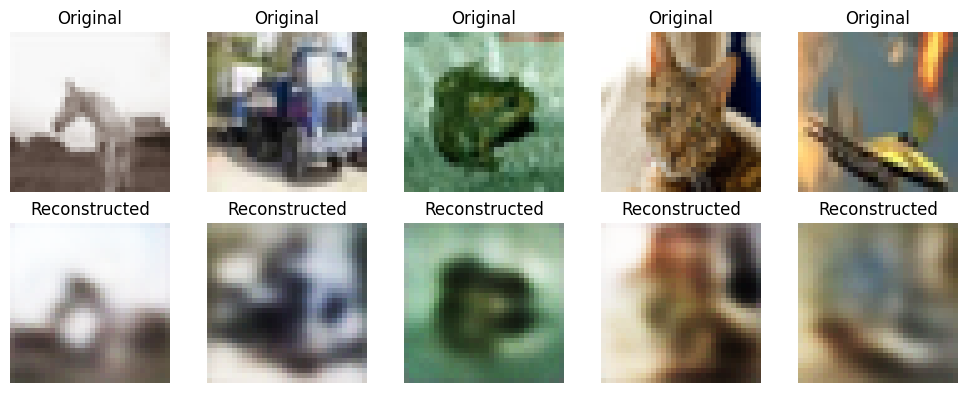

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  96/100  Batch:    1  Train Loss:  3157.05  LR:  4.90211e-05
Epoch:  96/100  Batch:  151  Train Loss:  3090.76  LR:  4.90211e-05
Epoch:  96/100  Batch:  301  Train Loss:  3058.93  LR:  4.90211e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      96 │          3118.59 │ 5.09s  │
╘═════════╧══════════════════╧════════╛


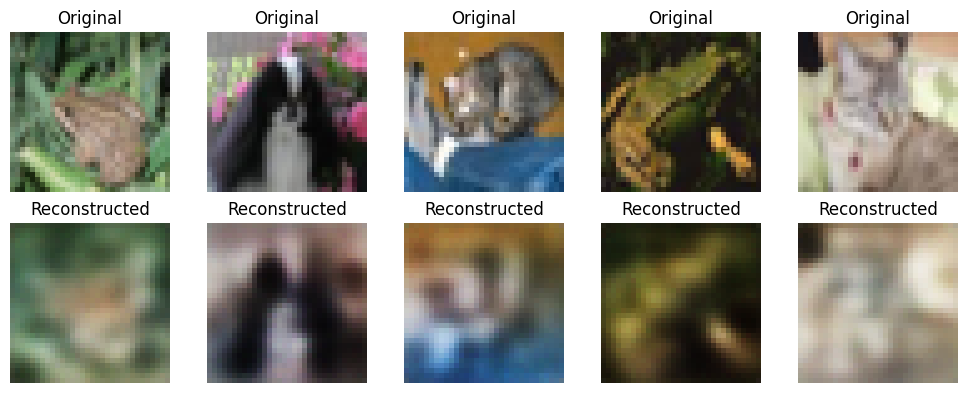

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  97/100  Batch:    1  Train Loss:  2989.99  LR:  4.93717e-05
Epoch:  97/100  Batch:  151  Train Loss:  3059.44  LR:  4.93717e-05
Epoch:  97/100  Batch:  301  Train Loss:  3052.95  LR:  4.93717e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      97 │           3080.1 │ 5.11s  │
╘═════════╧══════════════════╧════════╛


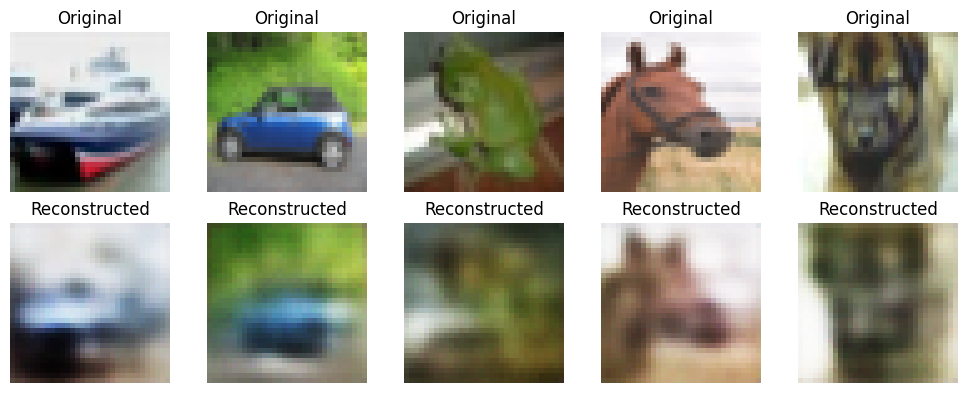

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  98/100  Batch:    1  Train Loss:  2875.14  LR:  4.96457e-05
Epoch:  98/100  Batch:  151  Train Loss:  3023.71  LR:  4.96457e-05
Epoch:  98/100  Batch:  301  Train Loss:  3064.61  LR:  4.96457e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      98 │          3097.49 │ 5.06s  │
╘═════════╧══════════════════╧════════╛


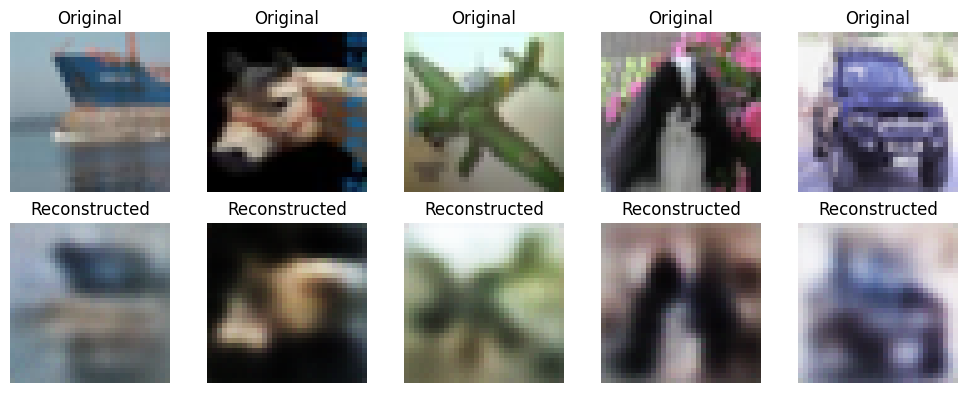

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  99/100  Batch:    1  Train Loss:  2921.08  LR:  4.98423e-05
Epoch:  99/100  Batch:  151  Train Loss:  3027.74  LR:  4.98423e-05
Epoch:  99/100  Batch:  301  Train Loss:  3043.26  LR:  4.98423e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│      99 │          3112.39 │ 5.20s  │
╘═════════╧══════════════════╧════════╛


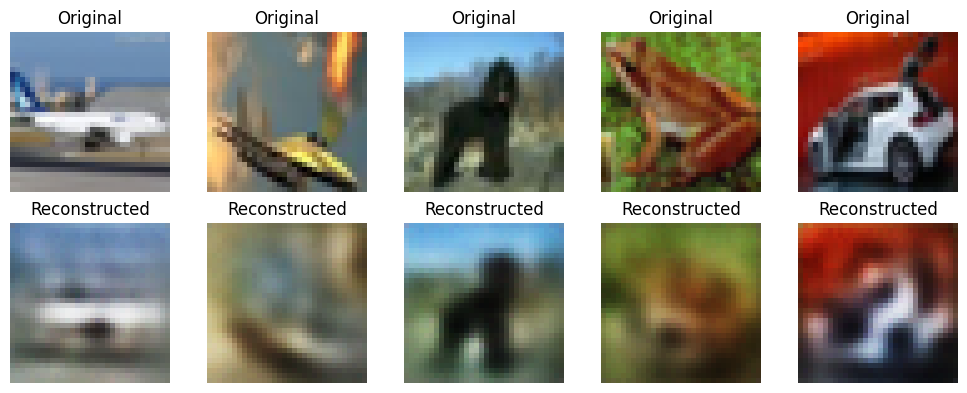

-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
Epoch:  100/100  Batch:    1  Train Loss:  3051.35  LR:  4.99605e-05
Epoch:  100/100  Batch:  151  Train Loss:  3003.93  LR:  4.99605e-05
Epoch:  100/100  Batch:  301  Train Loss:  3021.63  LR:  4.99605e-05
╒═════════╤══════════════════╤════════╕
│   Epoch │   Mean Test Loss │ Time   │
╞═════════╪══════════════════╪════════╡
│     100 │          3075.69 │ 5.11s  │
╘═════════╧══════════════════╧════════╛


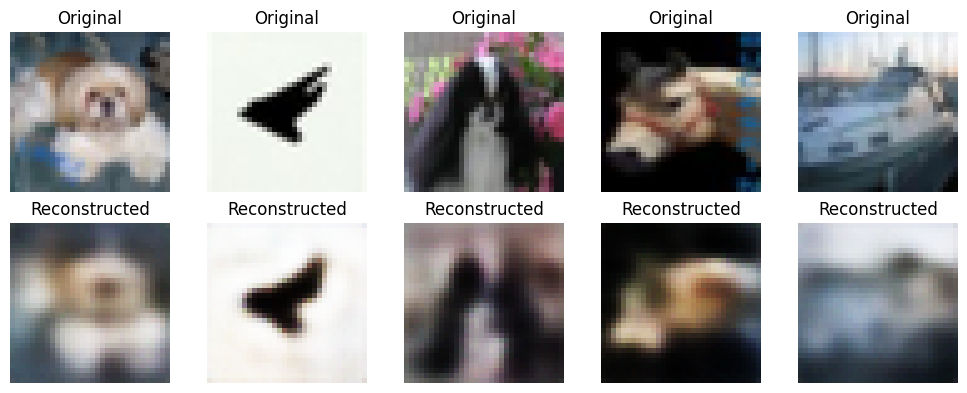

-----------------------------------------------------------------------------------------------------------------------------


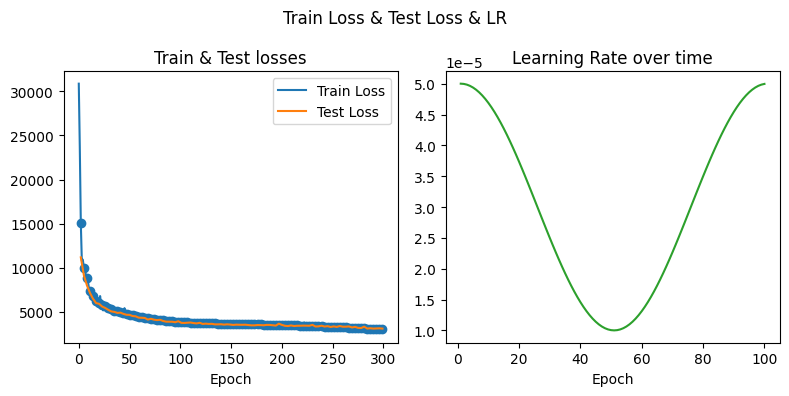

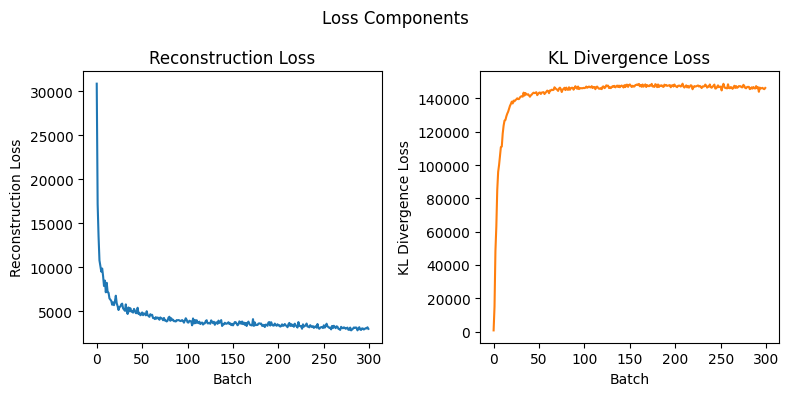

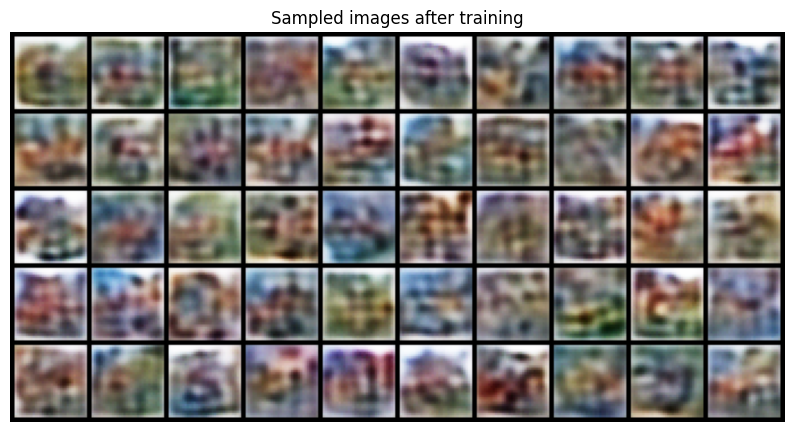

In [4]:
# Suppress user warnings
warnings.filterwarnings("ignore", category=UserWarning)

# We want to plot loss, its components and learning rate at the end of training
train_losses = []
test_losses = []
learning_rates = []
epoch_markers = []
reconstruction_losses = []
kl_losses = []

# Training loop
for epoch in range(num_epochs):
  print('-----------------------------------------------------------------------------------------------------------------------------')
  model.train()

  # Variables for frequent output
  losses = []

  # Start of time measurement
  epoch_start_time = time.time()

  for batch_idx, (data, _) in enumerate(train_loader):
    data = data.to(device)
    optimizer.zero_grad()

    with torch.cuda.amp.autocast():
      # Forward pass
      recon_batch, mu, logvar = model(data)

      # Compute loss
      loss, recon_loss, kl_loss = loss_function(recon_batch, data, mu, logvar)

    # Backward pass
    scaler.scale(loss).backward()

    # Optimization step
    scaler.step(optimizer)
    scaler.update()

    # Save the loss values for current batch
    losses.append(loss.detach().clone())

    # Log training loss and current learning rate
    if batch_idx % output_frequency == 0:
      average_loss = torch.stack(losses).mean().item()
      train_losses.append(average_loss)
      reconstruction_losses.append(recon_loss.detach().clone())
      kl_losses.append(kl_loss.detach().clone())
      losses = []
      log = [['Epoch:', f'{epoch + 1:3d}/{num_epochs:3d}', 'Batch:', f'{batch_idx + 1:3d}',
              'Train Loss:', f'{average_loss:.6f}', 'LR:', scheduler.get_last_lr()[0]]]
      print(tabulate(log, tablefmt="plain"))

  # Step the learning rate scheduler
  if scheduler is not None:
    lr = scheduler.get_last_lr()[0]
    scheduler.step()
  else:
    lr = learning_rate
  learning_rates.append(lr)

  # After the epoch, evaluate the accuracy on the test dataset
  mean_loss = evaluate(model, test_loader, loss_function, device)
  test_losses.append(mean_loss)

  if len(train_losses) > 0:
    epoch_markers.append(len(train_losses) - 1)

  # End of time measurement
  elapsed_time = time.time() - epoch_start_time

  # Log as a horizontal table
  headers = ["Epoch", "Mean Test Loss", "Time"]
  data = [[epoch + 1, f"{mean_loss:.4f}", f"{elapsed_time:.2f}s"]]
  print(tabulate(data, headers=headers, tablefmt="fancy_grid"))

  # Generate reconstructed test images after each epoch
  plot_reconstruction(model, test_loader, device, num_samples=5)
  print('-----------------------------------------------------------------------------------------------------------------------------')

# Plot Train Loss & Test Loss & LR
plot_loss_lr(num_epochs, epoch_markers, train_losses, test_losses, learning_rates)

# Plot each loss component
plot_loss_components(reconstruction_losses, kl_losses)

# Sample some VAE-generated images
sample(model, device, latent_dim, num_samples=50)